<img align='left' style='height:100px; width:100px;' src="https://resources.cdn.seon.io/uploads/2022/04/5-types-of-bank-account-fraud_isolated.png"><h1 style='color:red;'>&nbsp;&nbsp;<u>Bank Account Fraud Detection Case Study</u></h1> 

# Imports and Visualization

<h3>Import Libraries</h3>

In [1]:
import os
import numpy as np,seaborn as sns,pandas as pd,matplotlib.pyplot as plt,warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

/home/bernardo/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<h3>Read CSV</h3>

In [2]:
def load_test_csv(file):
    return pd.read_csv(file, dtype= {
    'id': np.int64,
    'income': np.float64,
    'name_email_similarity': np.float64,
    'prev_address_months_count': np.float64,
    'current_address_months_count': np.float64,
    'customer_age': np.float64,
    'days_since_request': np.float64,
    'intended_balcon_amount': np.float64,
    'payment_type': object,
    'zip_count_4w': np.float64,
    'velocity_6h': np.float64,
    'velocity_24h': np.float64,
    'velocity_4w': np.float64,
    'bank_branch_count_8w': np.float64,
    'date_of_birth_distinct_emails_4w': np.float64,
    'employment_status': object,
    'credit_risk_score': np.float64,
    'email_is_free': np.float64, # binary
    'housing_status': object,
    'phone_home_valid': np.float64, # binary
    'phone_mobile_valid': np.float64, # binary
    'bank_months_count': np.float64,
    'has_other_cards': np.float64, # binary
    'proposed_credit_limit': np.float64,
    'foreign_request': np.float64, # binary
    'source': object,
    'session_length_in_minutes': np.float64,
    'device_os': object,
    'keep_alive_session': np.float64, # binary
    'device_distinct_emails_8w': np.float64,
    'device_fraud_count': np.float64,
    'month': np.float64,
    'credit_utilization_ratio': np.float64,
    'distance_to_nearest_bank_branch': np.float64,
    'recent_loan_approval_ratio': np.float64,
    'transaction_amount_ratio': np.float64,
})

df = load_test_csv('train.csv')
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [3]:
df.head()

id  income  name_email_similarity  prev_address_months_count  \
0   46366     0.5               0.373871                       -1.0   
1  621359     0.9               0.825883                       -1.0   
2   43514     0.9               0.513736                       55.0   
3   60994     0.9               0.489962                      118.0   
4   66978     0.4               0.765966                       -1.0   

   current_address_months_count  customer_age  days_since_request  \
0                         121.0          30.0            0.003567   
1                          49.0          50.0            0.030717   
2                           5.0          50.0            0.027741   
3                           1.0          50.0            0.006615   
4                          44.0          40.0            0.003371   

   intended_balcon_amount payment_type  zip_count_4w  ...  device_os  \
0               -0.472057           AC         658.0  ...      other   
1               -1.061802           AB         640.0  ...    windows   
2               -0.544109           AB        1862.0  ...    windows   
3               -0.755948           AD         251.0  ...      other   
4               -0.923310           AD         642.0  ...      linux   

   keep_alive_session  device_distinct_emails_8w  device_fraud_count  month  \
0                 1.0                        1.0                 0.0    7.0   
1                 0.0                        1.0                 0.0    0.0   
2                 1.0                        1.0                 0.0    7.0   
3                 1.0                        1.0                 0.0    7.0   
4                 1.0                        1.0                 0.0    7.0   

  credit_utilization_ratio  distance_to_nearest_bank_branch  \
0                      0.5                         0.764169   
1                      0.1                         0.616470   
2                      0.1                         0.302784   
3                      0.1                         0.640823   
4                      0.6                         0.373017   

   recent_loan_approval_ratio transaction_amount_ratio  fraud_bool  
0                    0.339598                 0.543121           0  
1                    0.498923                 0.869324           1  
2                    0.395494                 0.891434           0  
3                    0.488663                 0.840134           0  
4                    0.422912                 0.340242           0  

[5 rows x 37 columns]

## Data Info 

We have 70000 records. Some of them with Nan values. We have 36 features and 1 target variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                70000 non-null  int64  
 1   income                            69928 non-null  float64
 2   name_email_similarity             69926 non-null  float64
 3   prev_address_months_count         70000 non-null  float64
 4   current_address_months_count      70000 non-null  float64
 5   customer_age                      69937 non-null  float64
 6   days_since_request                70000 non-null  float64
 7   intended_balcon_amount            70000 non-null  float64
 8   payment_type                      69940 non-null  object 
 9   zip_count_4w                      70000 non-null  float64
 10  velocity_6h                       70000 non-null  float64
 11  velocity_24h                      70000 non-null  float64
 12  velo

In [5]:
def all_unique(df):
    return [(i, df[i].unique()) for i in df.columns]

for i,j in all_unique(df):
    print(i, j)


for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        min_value = df[column].min()
        max_value = df[column].max()
        print(f'Column: {column}, Min: {min_value}, Max: {max_value}')
    else:
        print(f'Column: {column} is Categorical')
 

id [ 46366 621359  43514 ...  28475  11482 513057]
income [0.5 0.9 0.4 0.2 0.7 0.3 0.1 0.6 0.8 nan]
name_email_similarity [0.37387107 0.82588341 0.51373642 ... 0.89127634 0.69402929 0.18265925]
prev_address_months_count [ -1.  55. 118. 147. 144.  52. 106.  45. 293.  25.  24.  29.  22.  12.
  96.  34.  67.  50. 100.  61.  36. 181.  28.  32.  35. 108.  93. 315.
 149.  65. 110. 127.  89.  49. 103.  10. 148.  99.  54.  11.  69.  31.
  62.  86. 101.  42.   9. 197. 195.  30.  51.  90.  27.  33.  94. 107.
  60.  91.  57.  83.  88.  37.  13.  59.  18.  21.  48.  47. 318.  26.
 292.  97.  95.  19. 323.  66. 328.  64.  46. 105.  53.   8.  38. 320.
 111. 230. 338.  23. 155. 204. 146.  92.  63. 122. 185.  78.  98. 141.
 177.  58.  80. 245. 214. 166. 112. 104.  56. 337.  82.  40. 180.  43.
 176.  87.  44. 109. 306.  85. 179. 170. 120. 102. 298. 156.  41. 125.
 174.  20.  68.  71. 311.  79.  74. 113. 163. 150. 217. 133. 139. 165.
 114. 319. 117.  76. 182. 287.  72. 132. 307. 302. 143. 212.  81. 299.

# Data Cleaning

After observing the data, we can see that there are some columns which are not useful for our analysis.
1. Column 'id' is just the index of the data. So, we will drop this column.
2. Columns that have only one unique value. We will drop these columns as they are not useful for our analysis, like 'device_fraud_count'.
3. Column 'customer_age' has a lot of negative values. We will drop the rows that have negative values in this column.
4. The values of proposed_credit_limit must be between 200 and 2000. We will drop the rows that have values less than 200 and greater than 2000.

We need to clean the data before we can use it for our analysis. 
1. We will check what columns have missing values.
2. We will be searching for '-1' that is used as a placeholder for missing values.
2. We will check what percentage of data is missing in each column.
3. We will drop columns that have more than 60% missing values.
4. We will check if there are any duplicate rows in the data.

In [6]:
df.drop(['device_fraud_count', 'id'],1,inplace=True)
df = df[(df['customer_age'] >= 10) & (df['customer_age'] <= 90)]
df = df[(df['proposed_credit_limit'] >= 200) & (df['proposed_credit_limit'] <= 2000)]
df = df[(df['transaction_amount_ratio'] >= 0) & (df['transaction_amount_ratio'] <= 1)]

/tmp/ipykernel_8833/3245122352.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['device_fraud_count', 'id'],1,inplace=True)


In [7]:
columns_that_have_placeholders = ['prev_address_months_count','current_address_months_count','bank_months_count']
for i in columns_that_have_placeholders:
    df[i] = df[i].replace(-1, np.nan)

In [8]:
def is_number(obj):
    return isinstance(obj, (int, float, complex))

missing_props_train = df.isna().median()
for i in missing_props_train[missing_props_train > 0.6].index:
    df.drop(i, axis=1, inplace=True) 
    
missing_props_train = df.isna().median()    
for i in missing_props_train[missing_props_train > 0].index:
    if(is_number(df[i][0])):
        df[i] = df[i].fillna(df[i].median())  

In [9]:
df.duplicated().any()

False

# Data Distribution

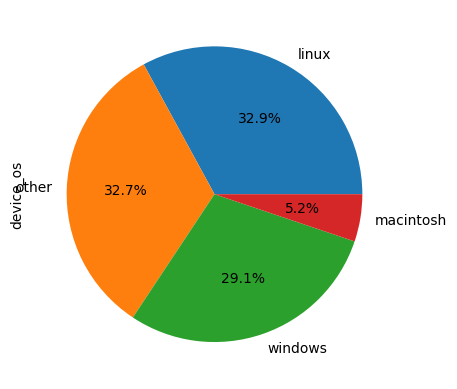

In [10]:
df['device_os']=df['device_os'].replace('x11','other')
df['device_os'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

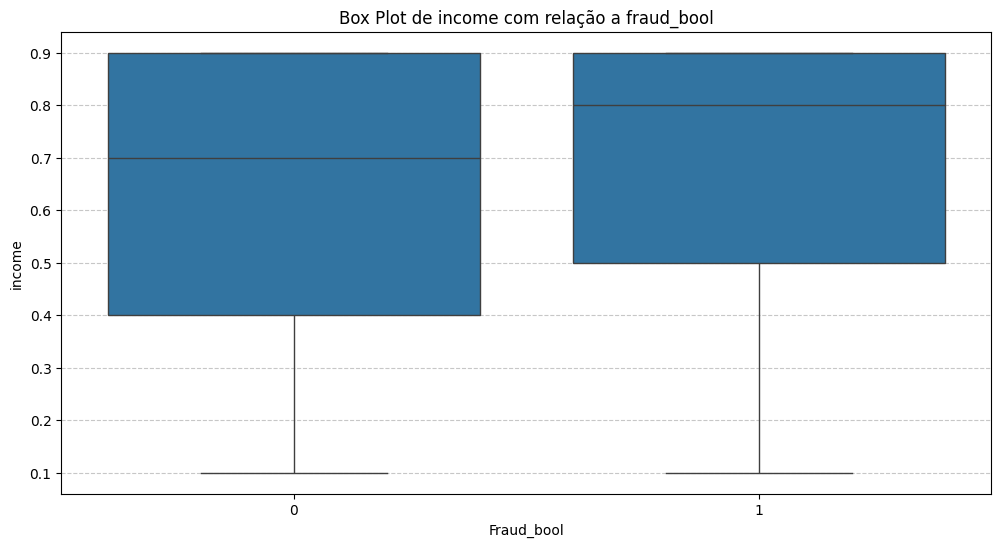

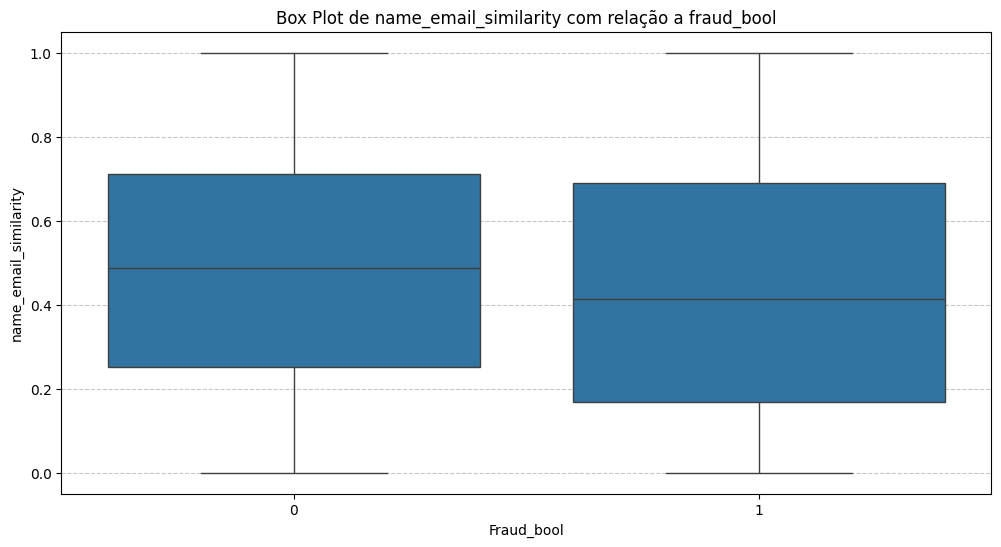

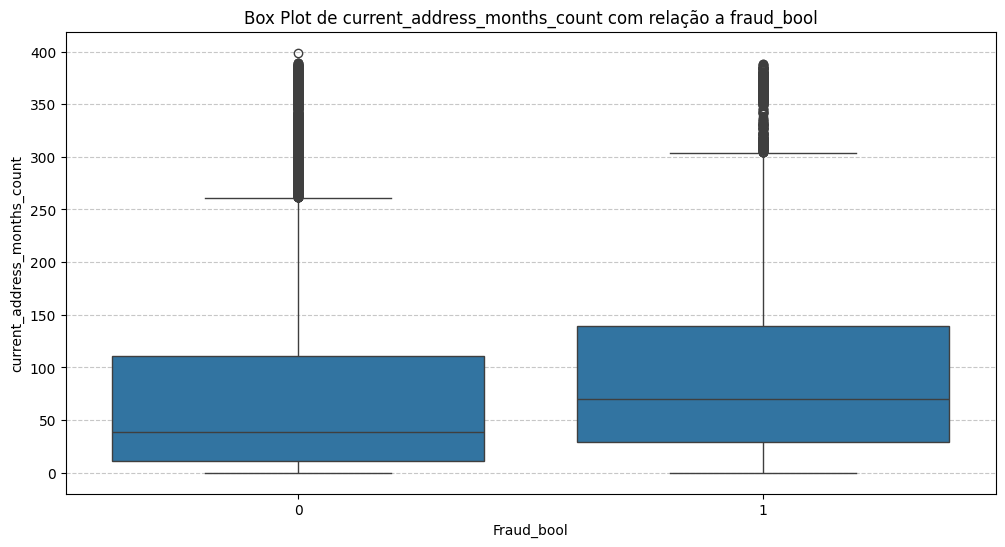

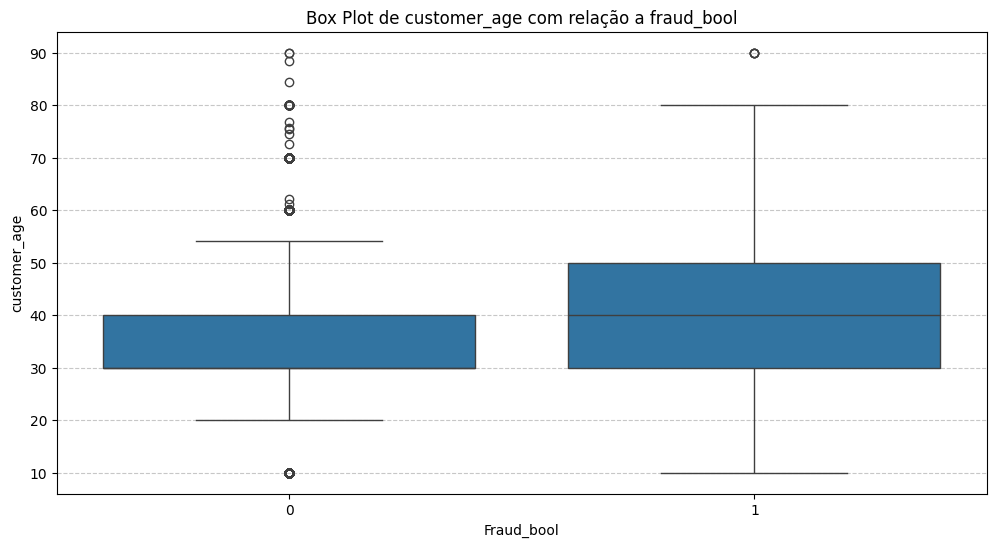

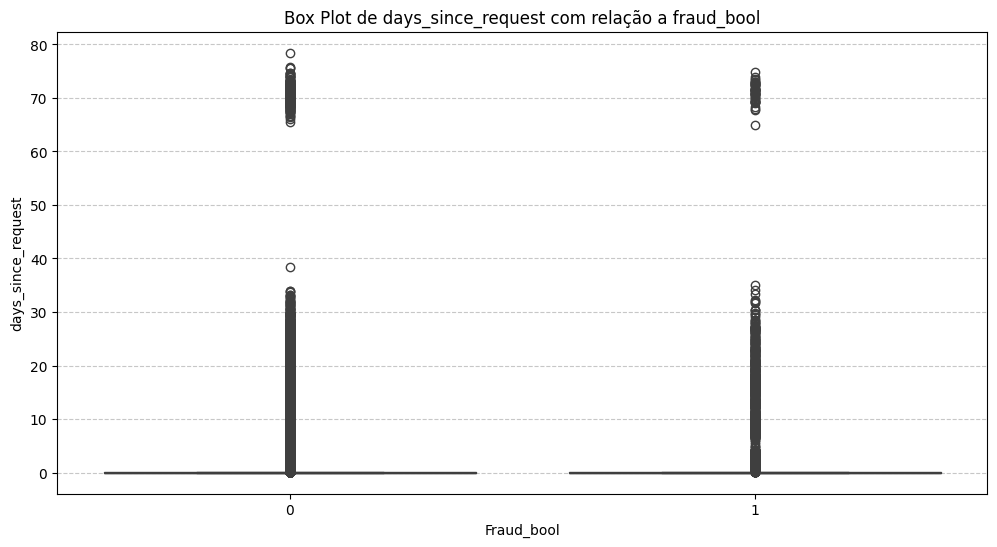

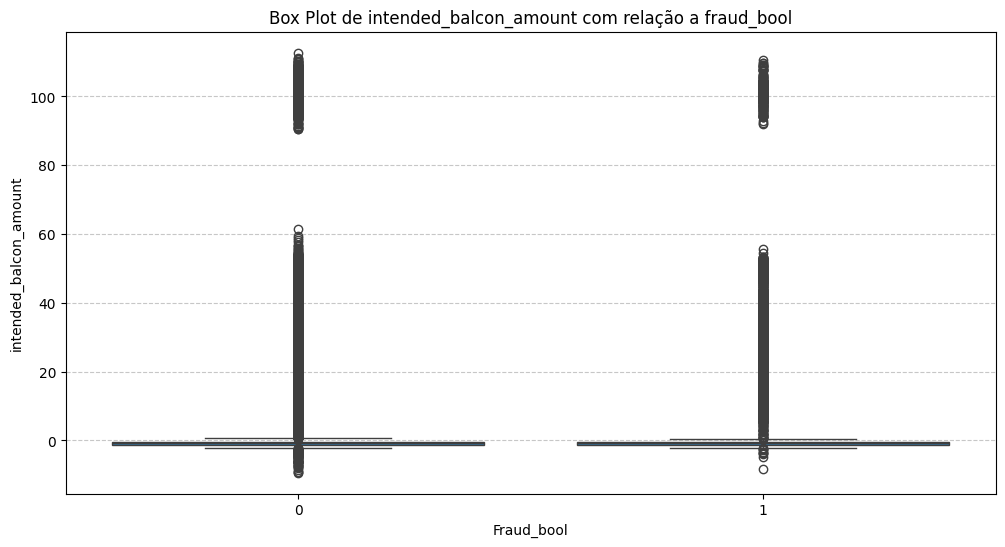

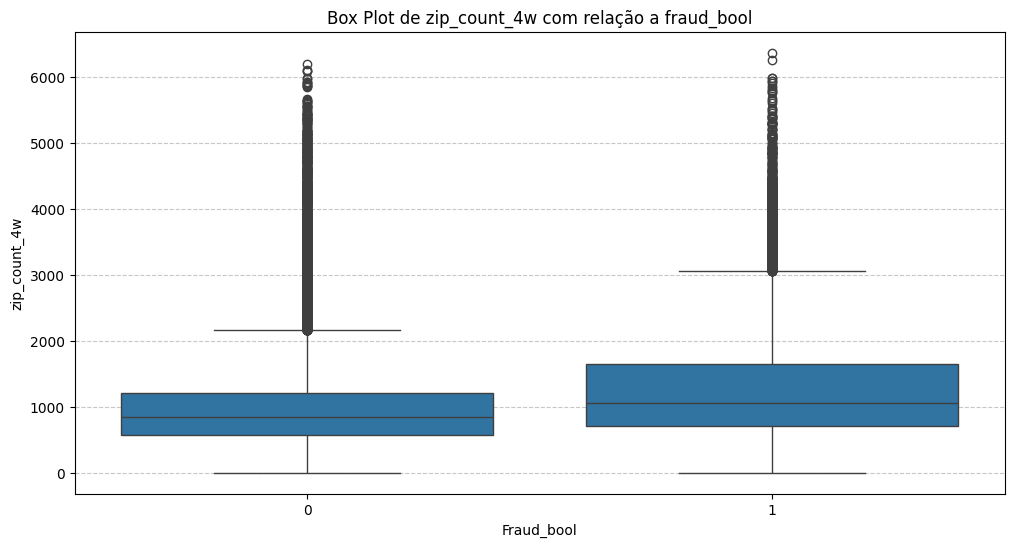

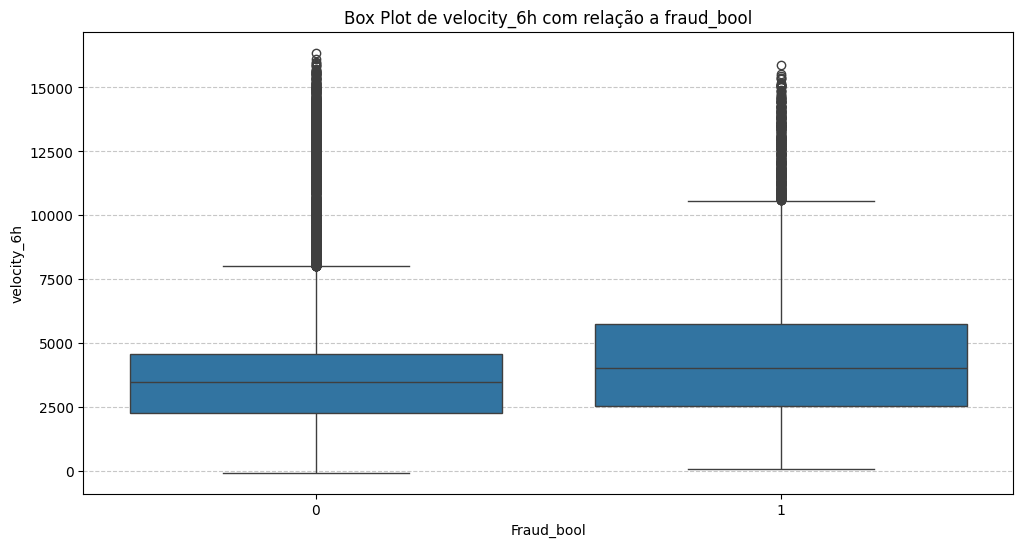

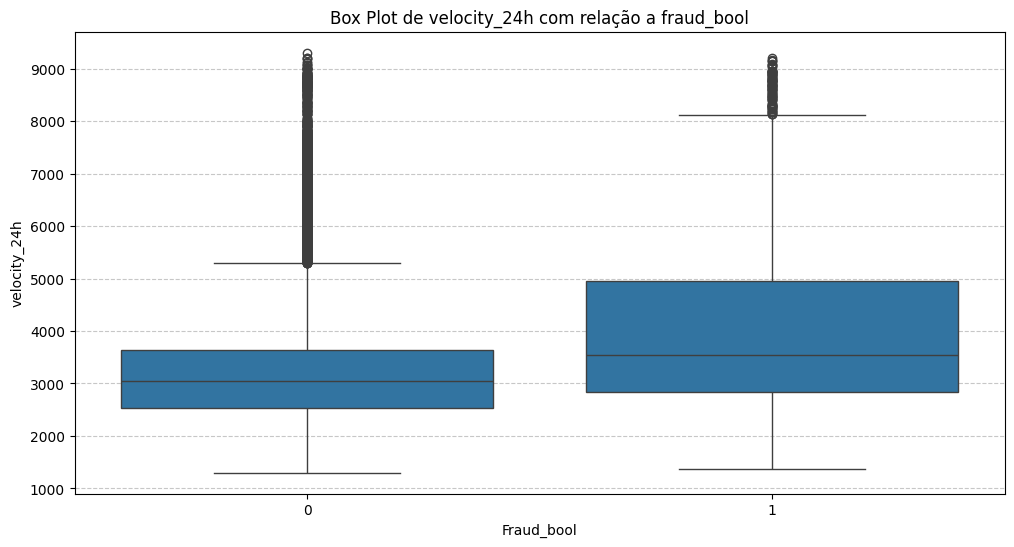

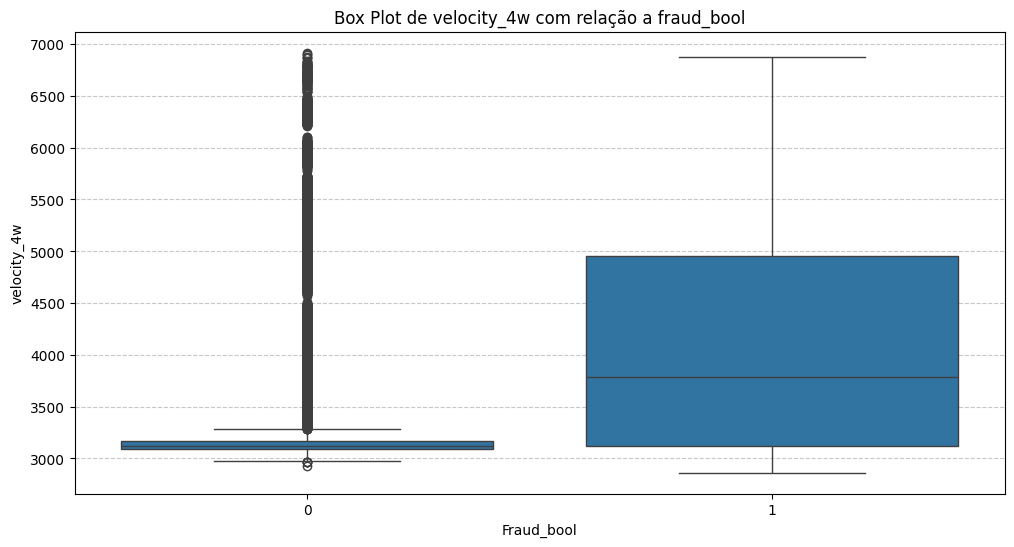

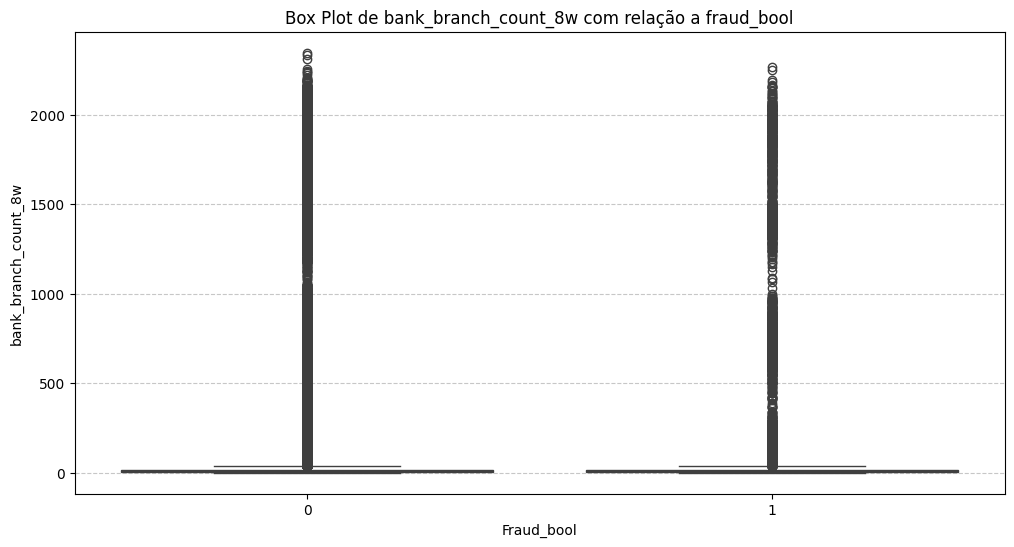

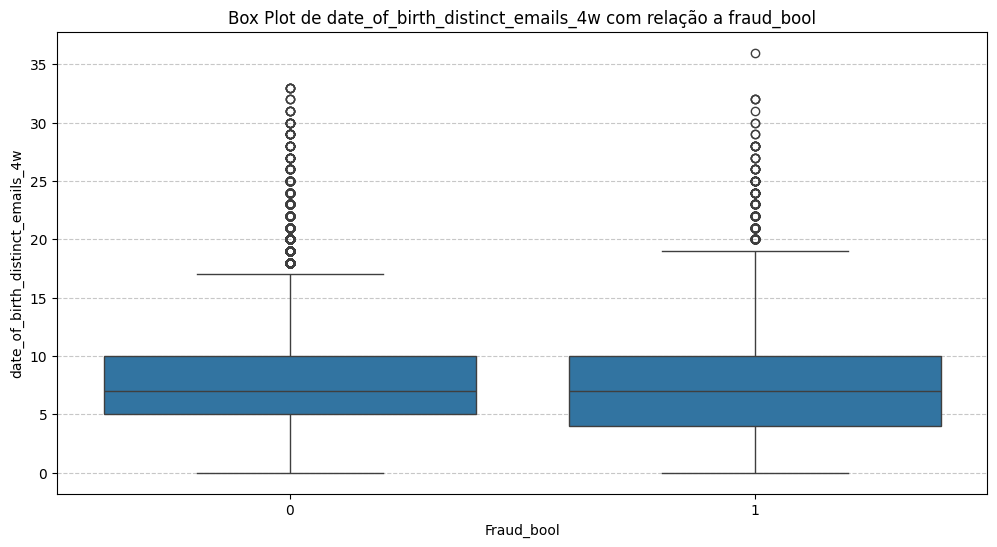

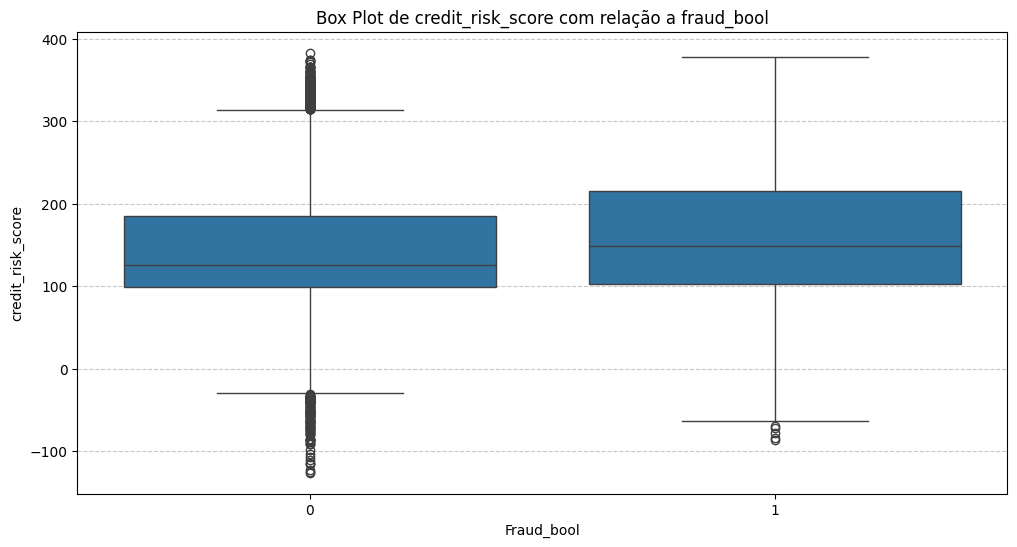

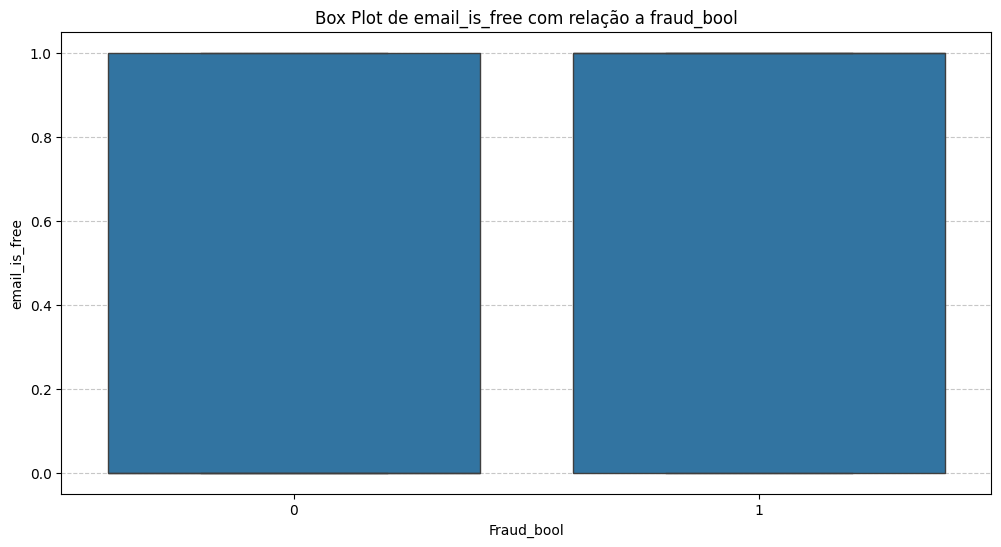

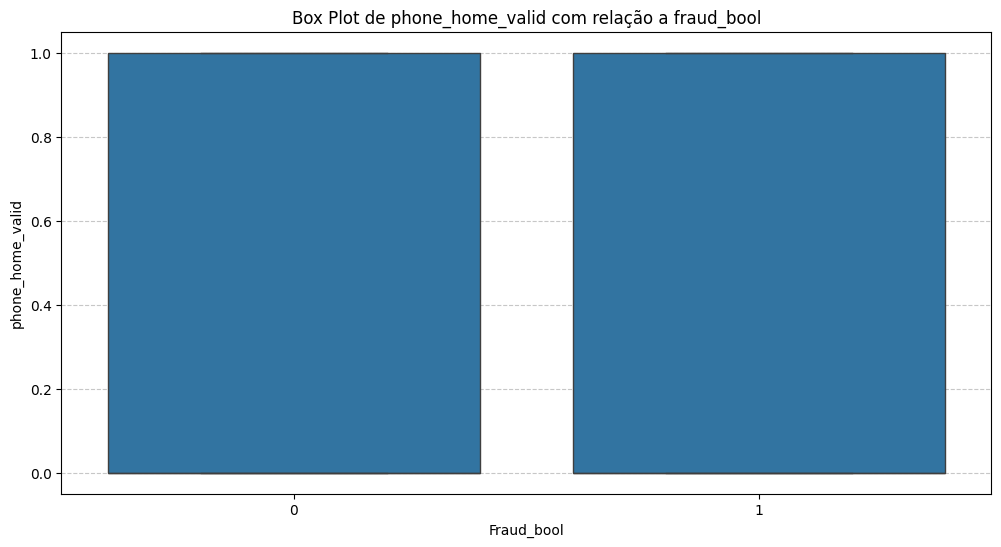

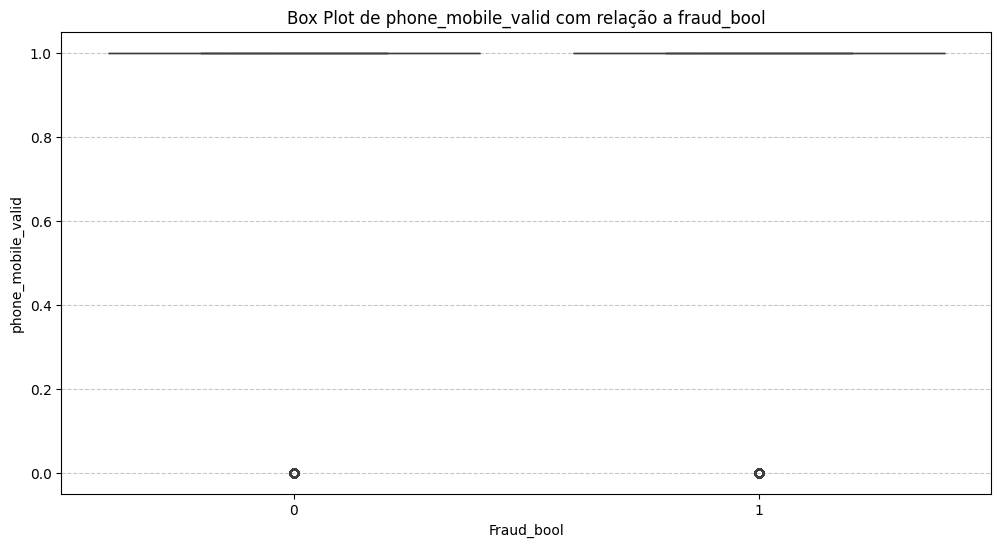

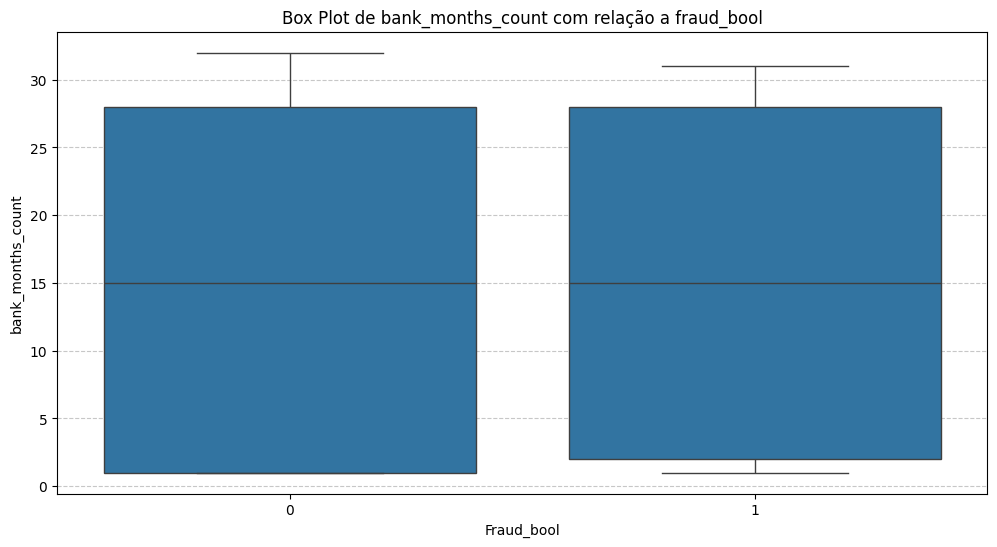

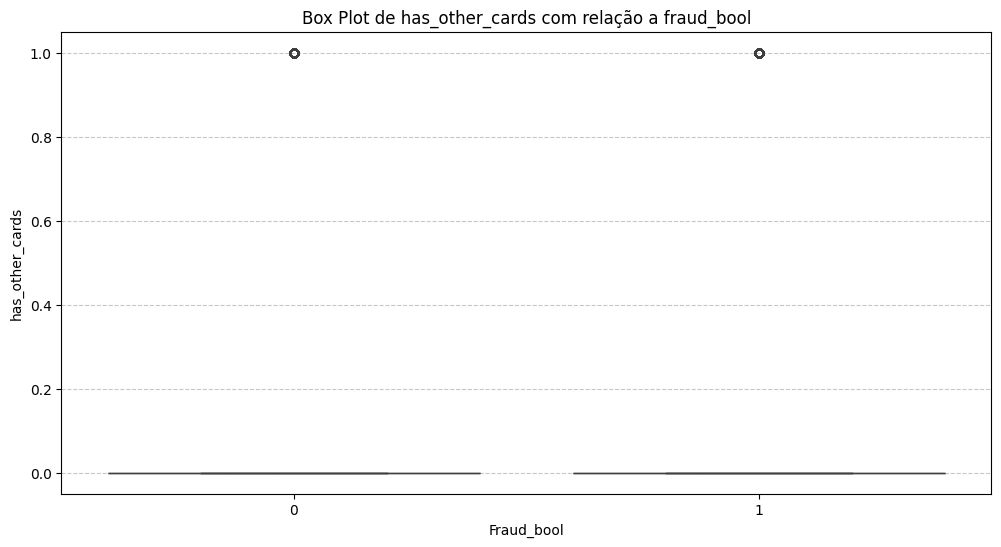

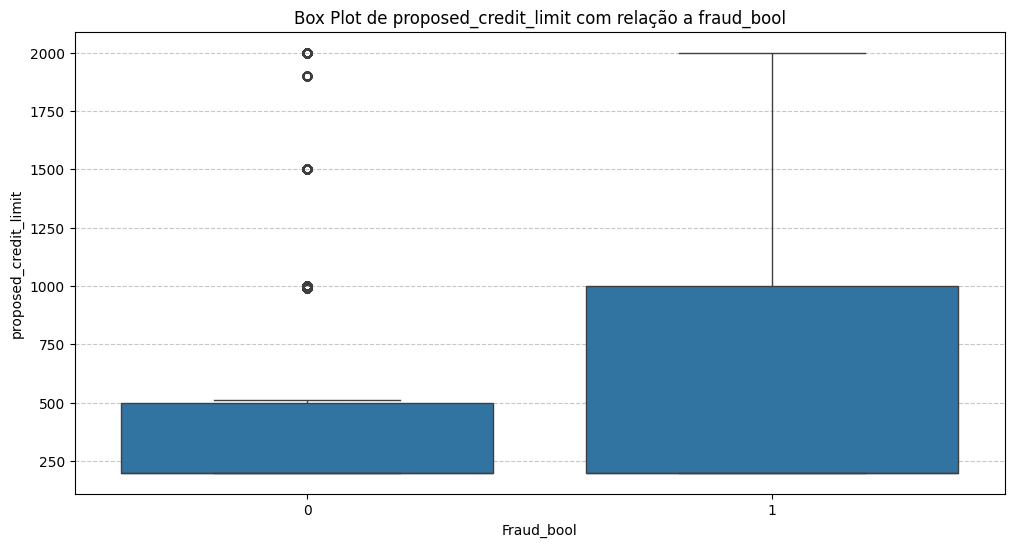

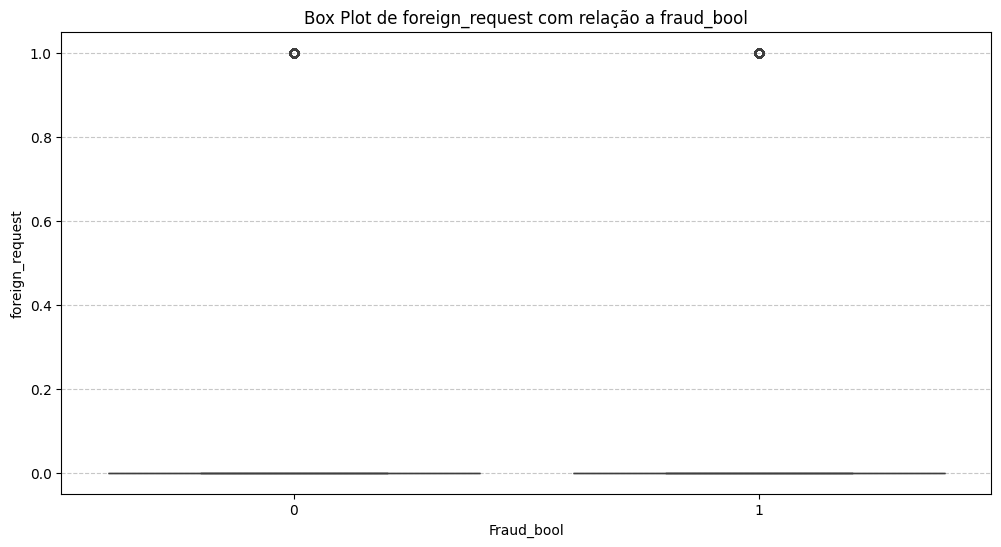

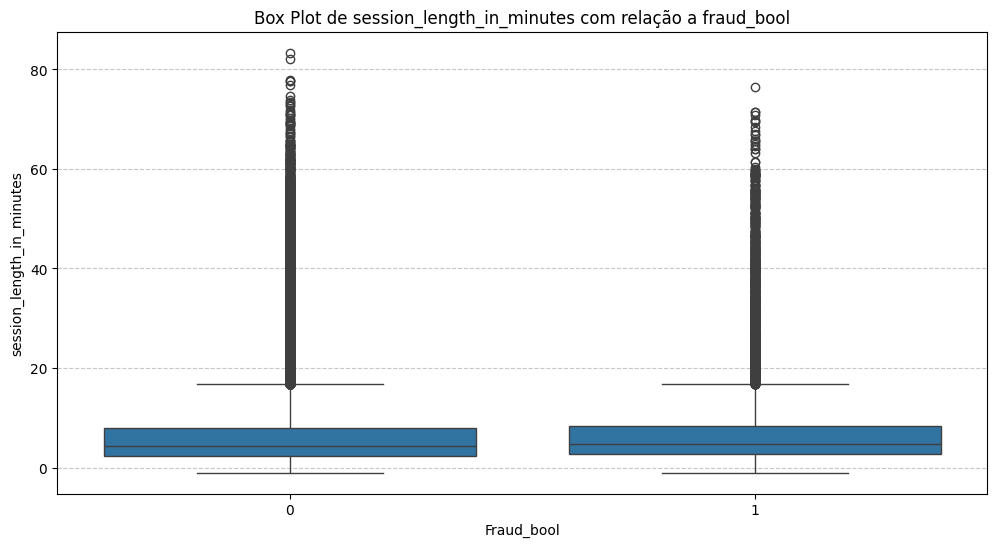

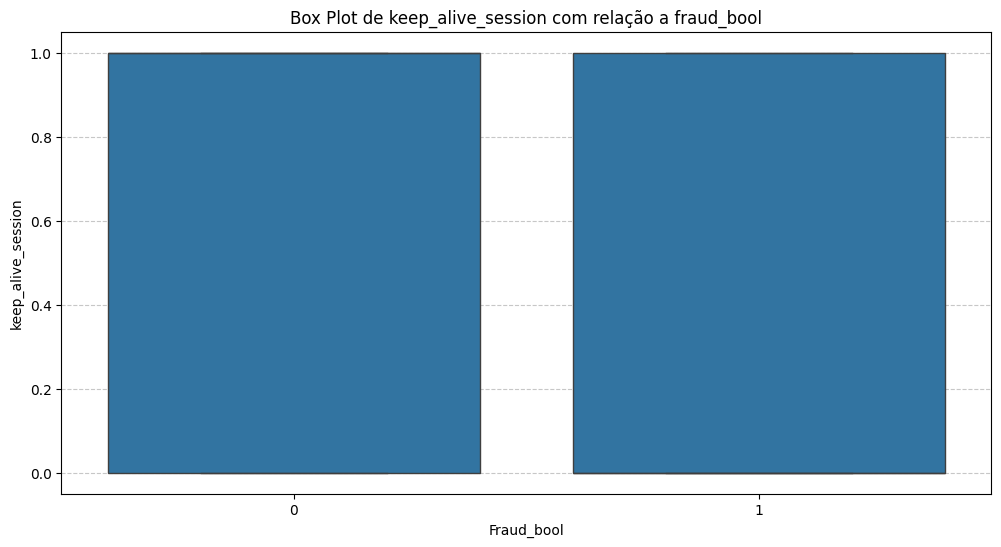

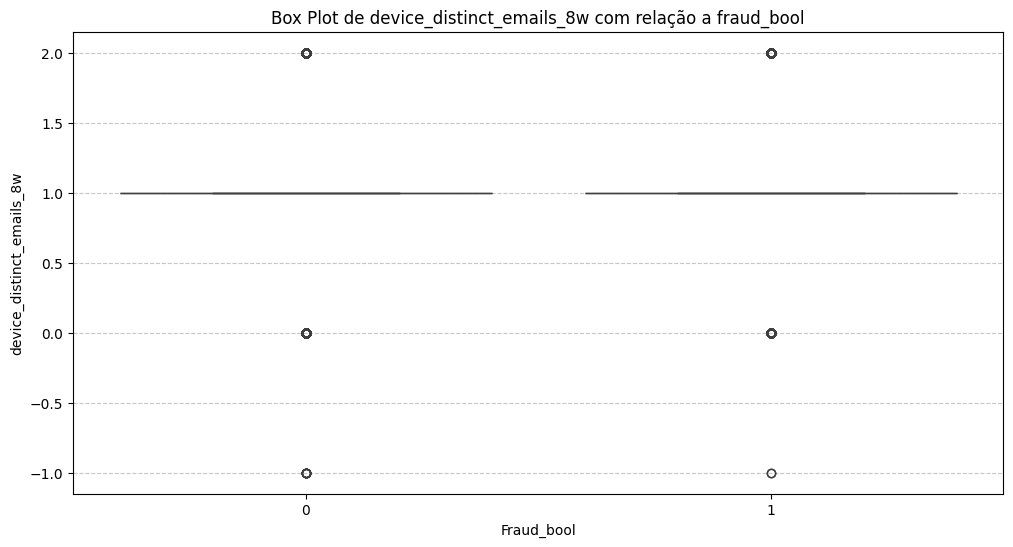

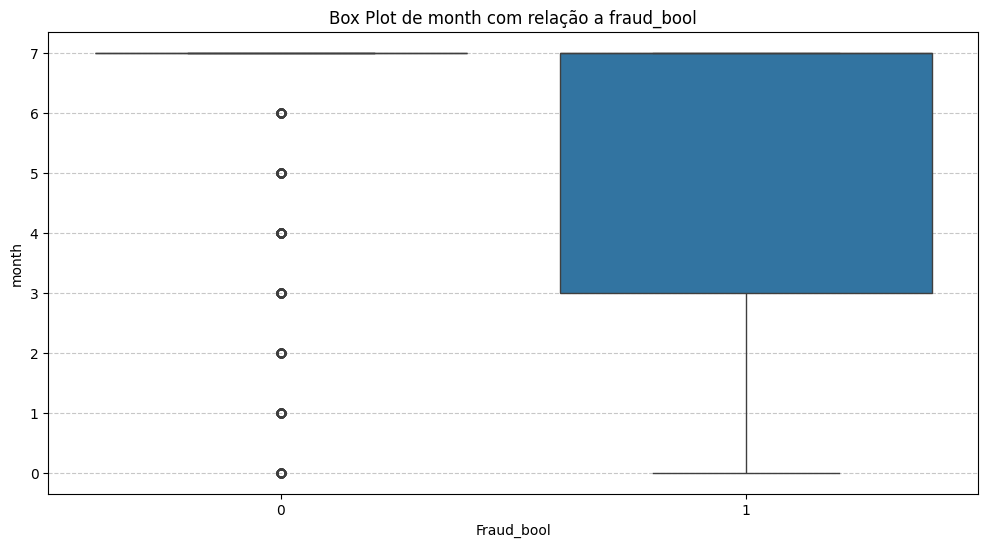

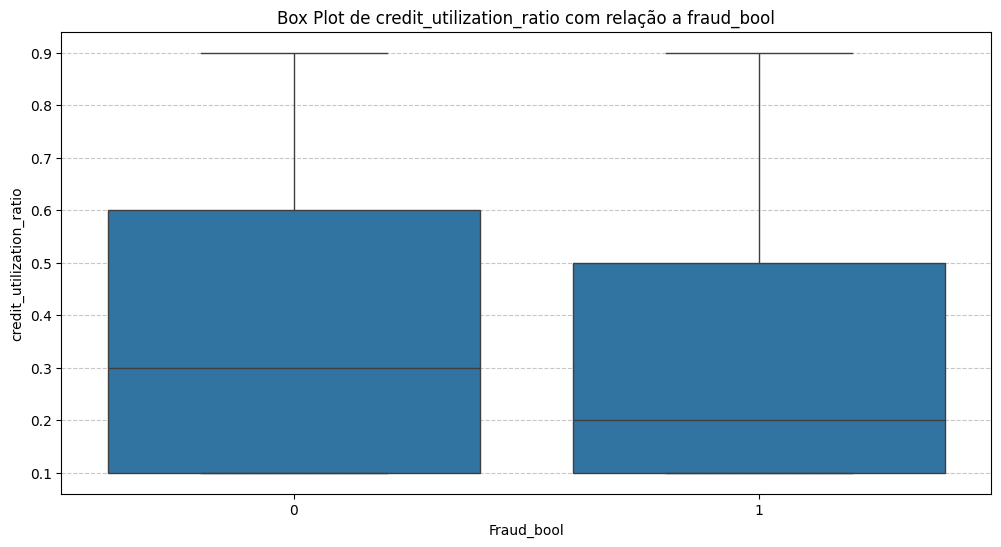

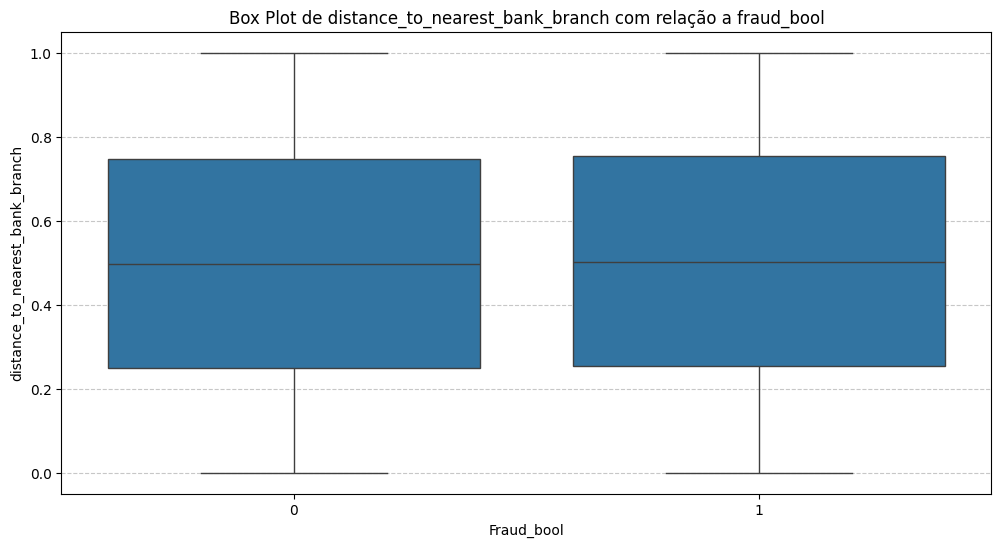

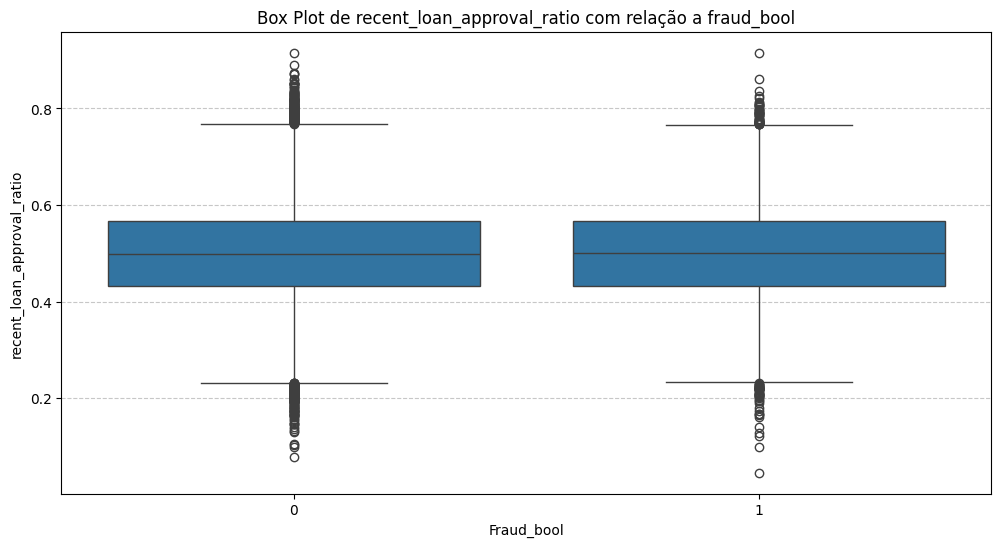

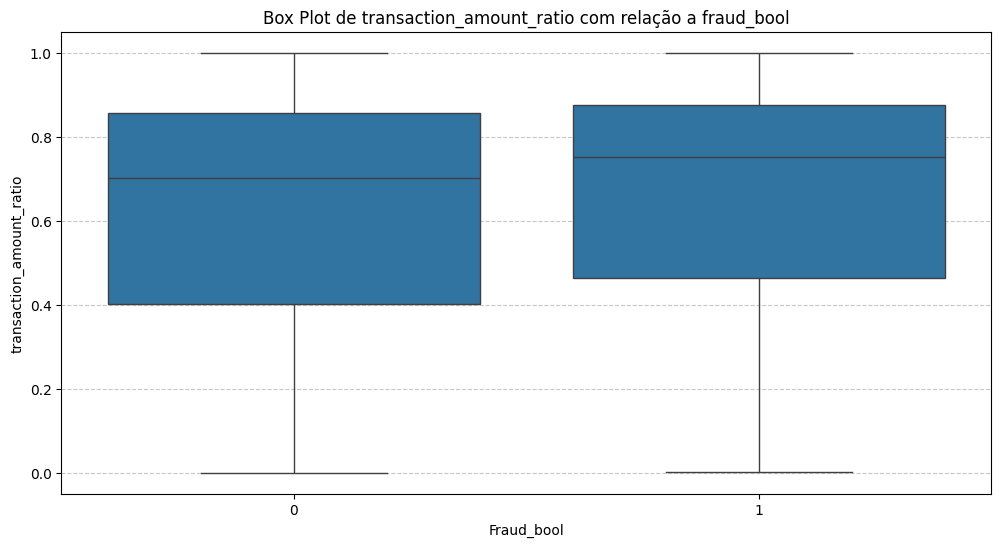

In [11]:
def plot_box_plots_with_fraud(df, fraud_column, features_to_plot, output_directory):
    for feature in features_to_plot:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=fraud_column, y=feature, data=df)
        plt.title(f'Box Plot de {feature} com relação a {fraud_column}')
        plt.xlabel(fraud_column.capitalize())
        plt.ylabel(feature)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.savefig(os.path.join(output_directory, f'box_plot_{feature}_{fraud_column}.png'))
        plt.show()

output_directory = 'plots'
features_to_plot = df.select_dtypes(include='number').columns
features_to_plot = features_to_plot.drop('fraud_bool')
plot_box_plots_with_fraud(df, 'fraud_bool', features_to_plot, output_directory)

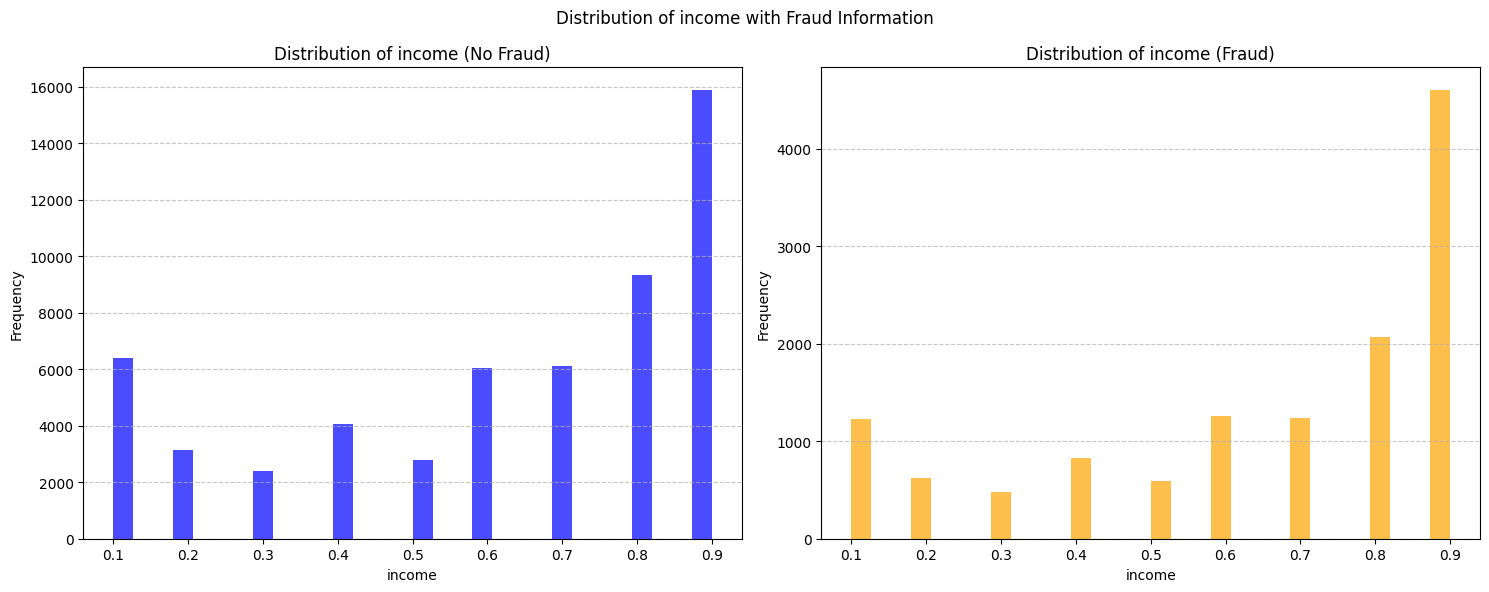

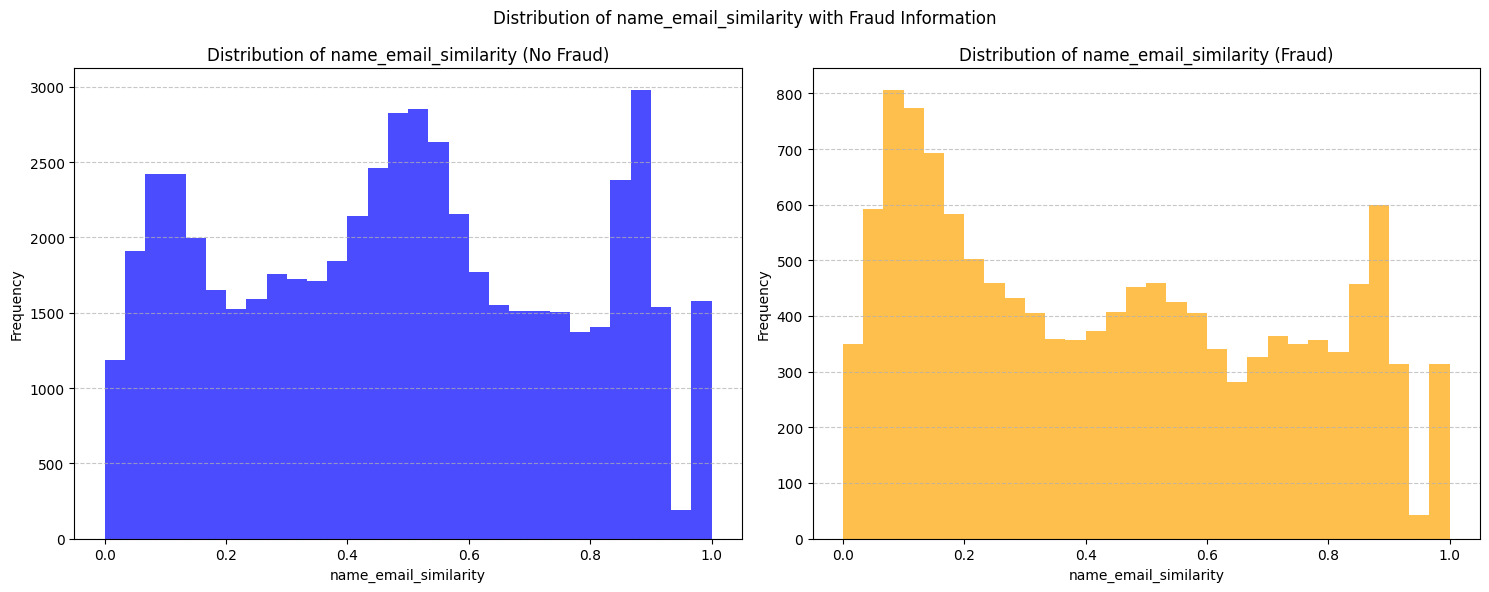

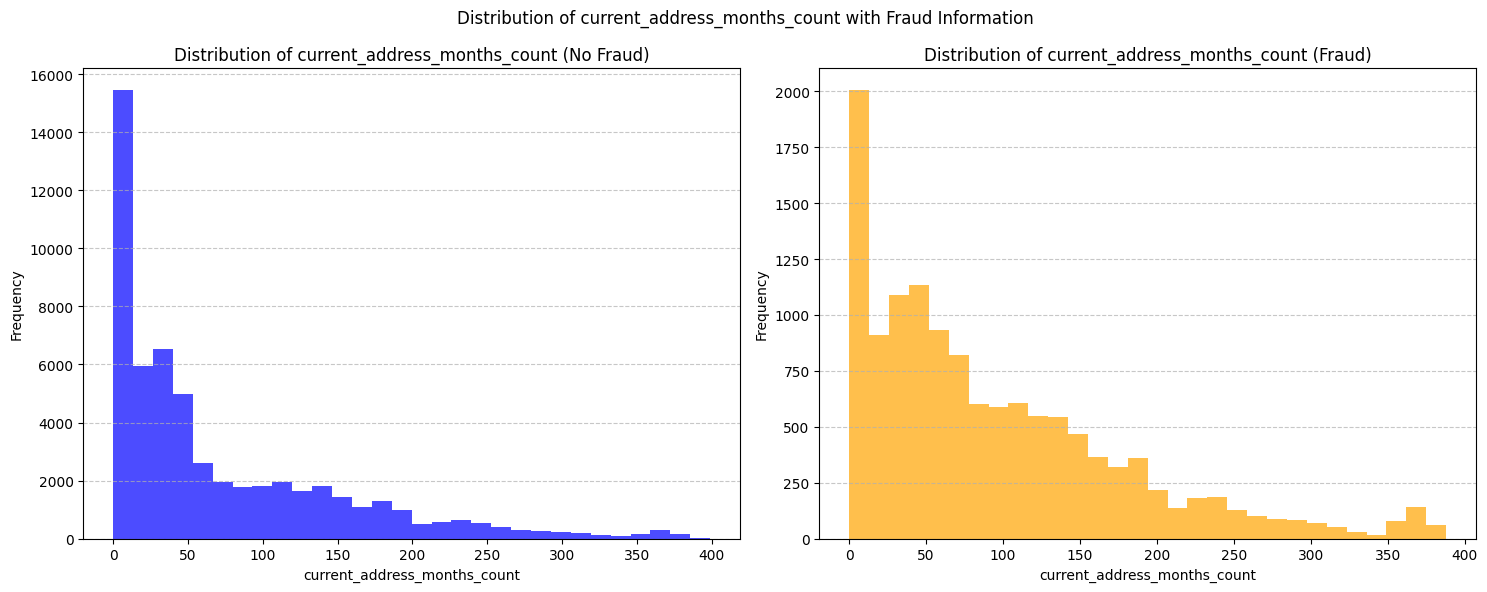

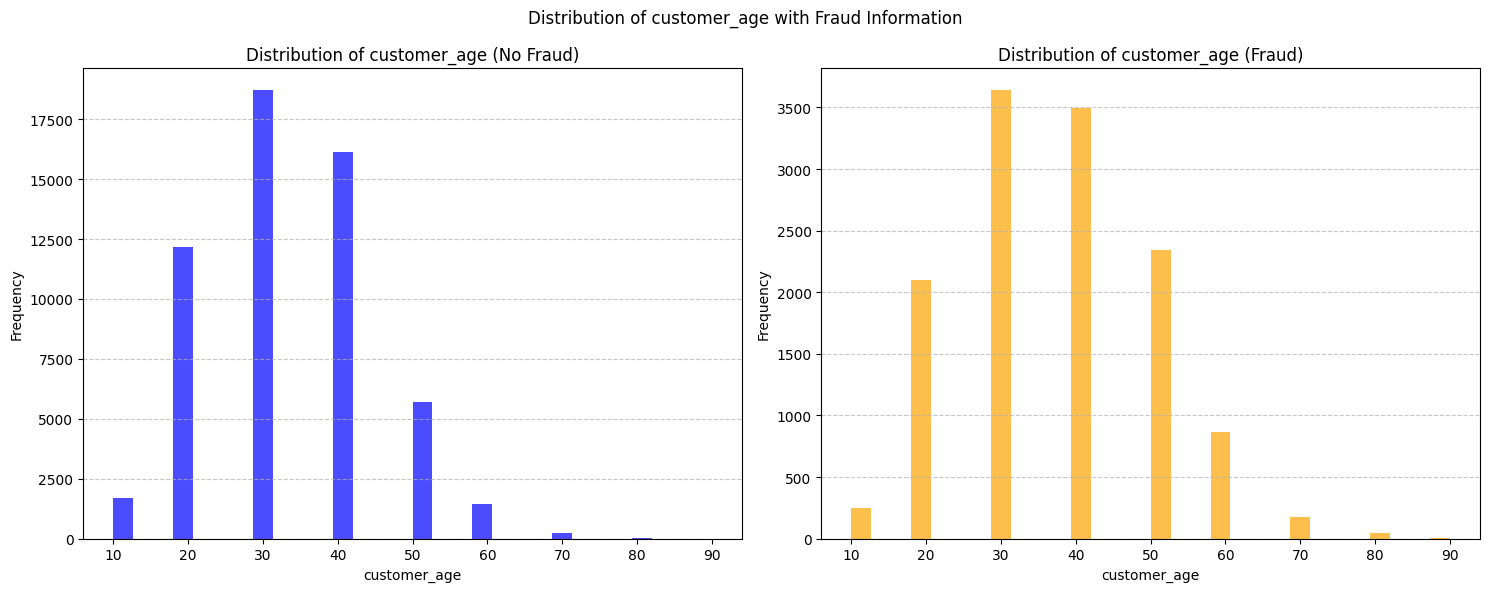

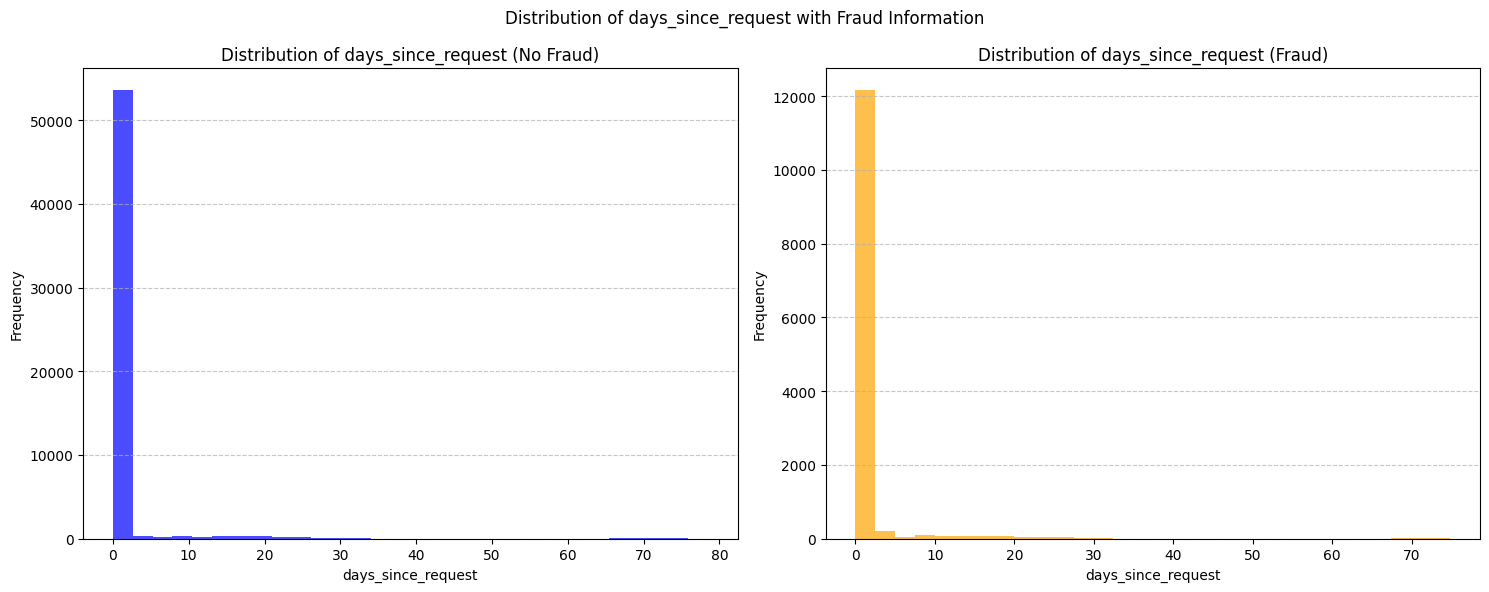

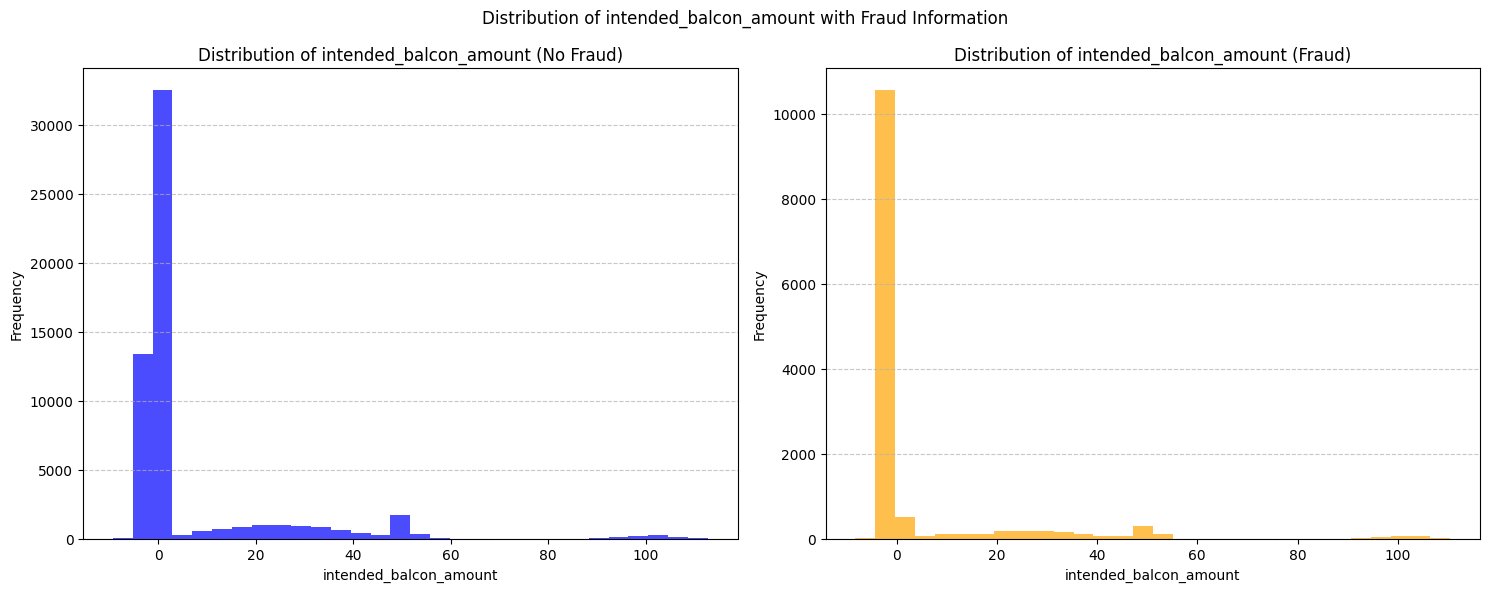

/tmp/ipykernel_8833/374368046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 0], x=column, order=categories_order, palette='Blues')
/tmp/ipykernel_8833/374368046.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 1], x=column, order=categories_order, palette='Oranges')


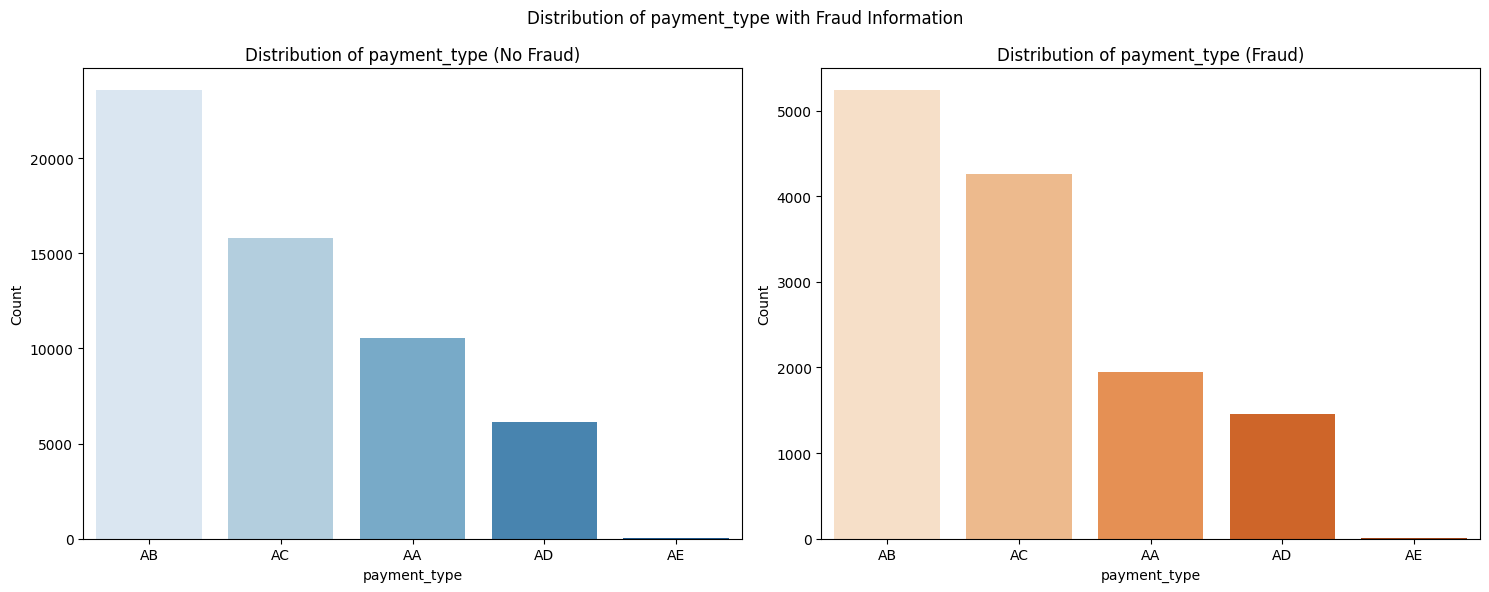

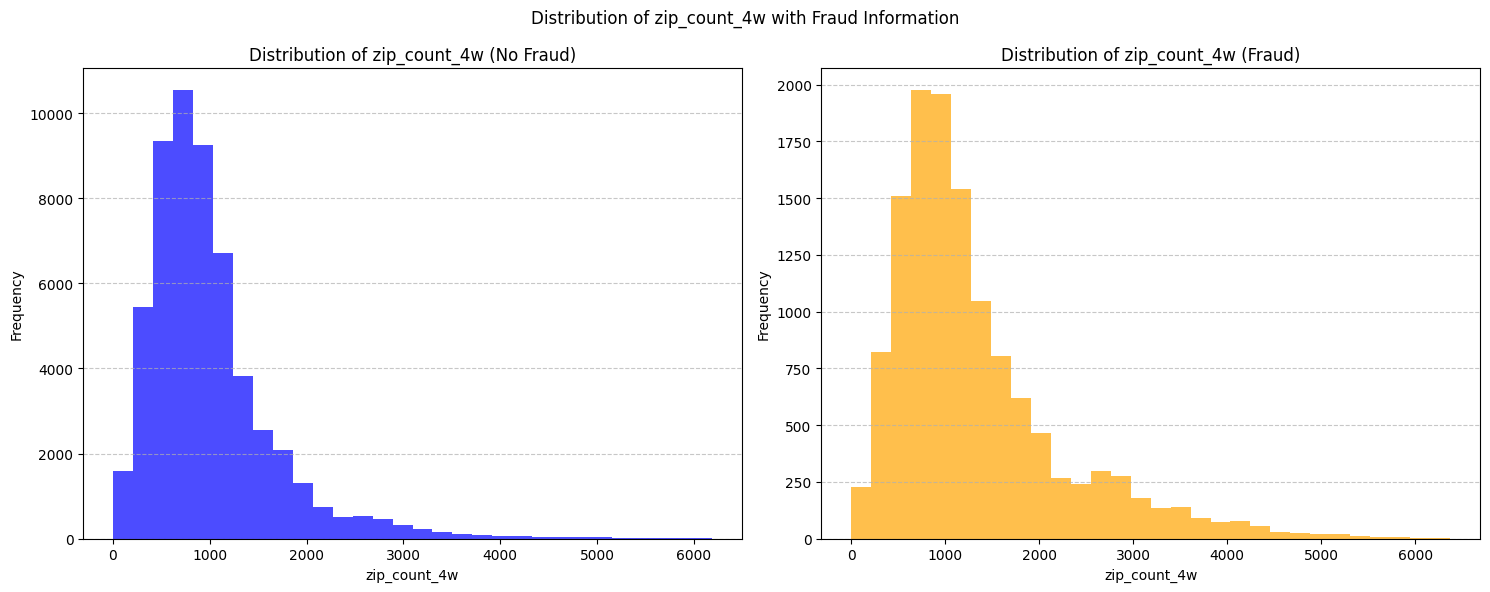

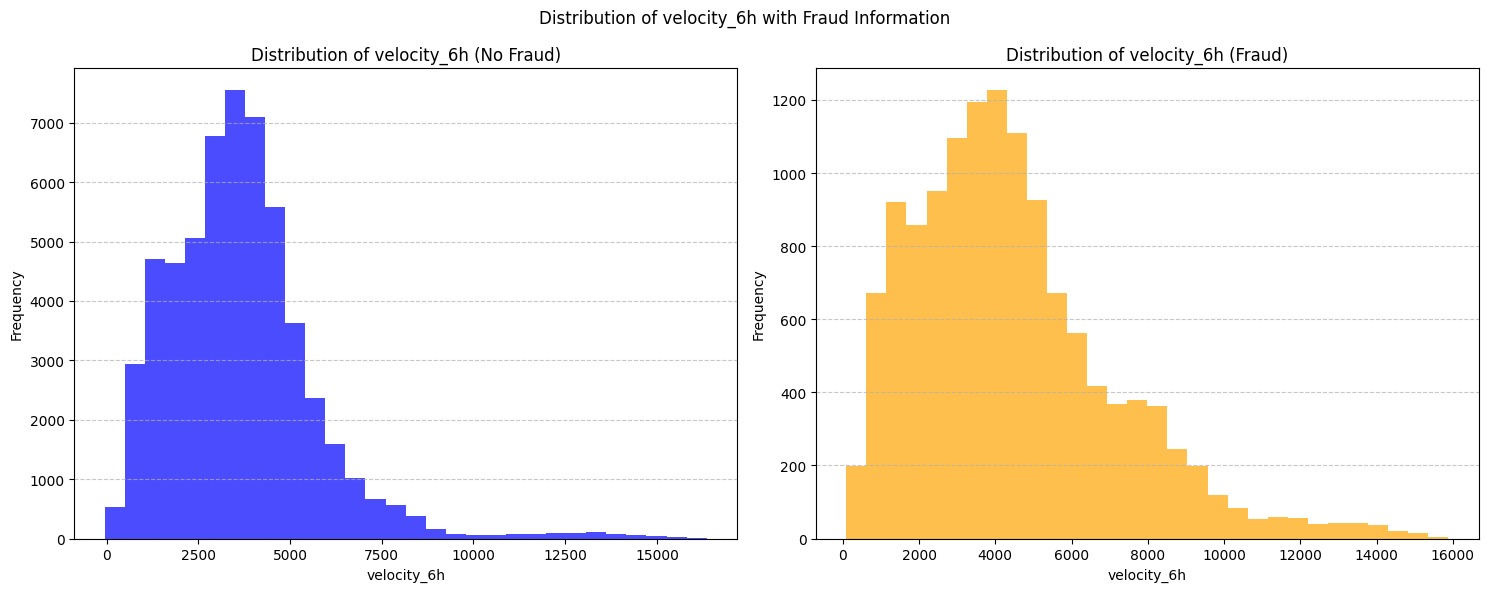

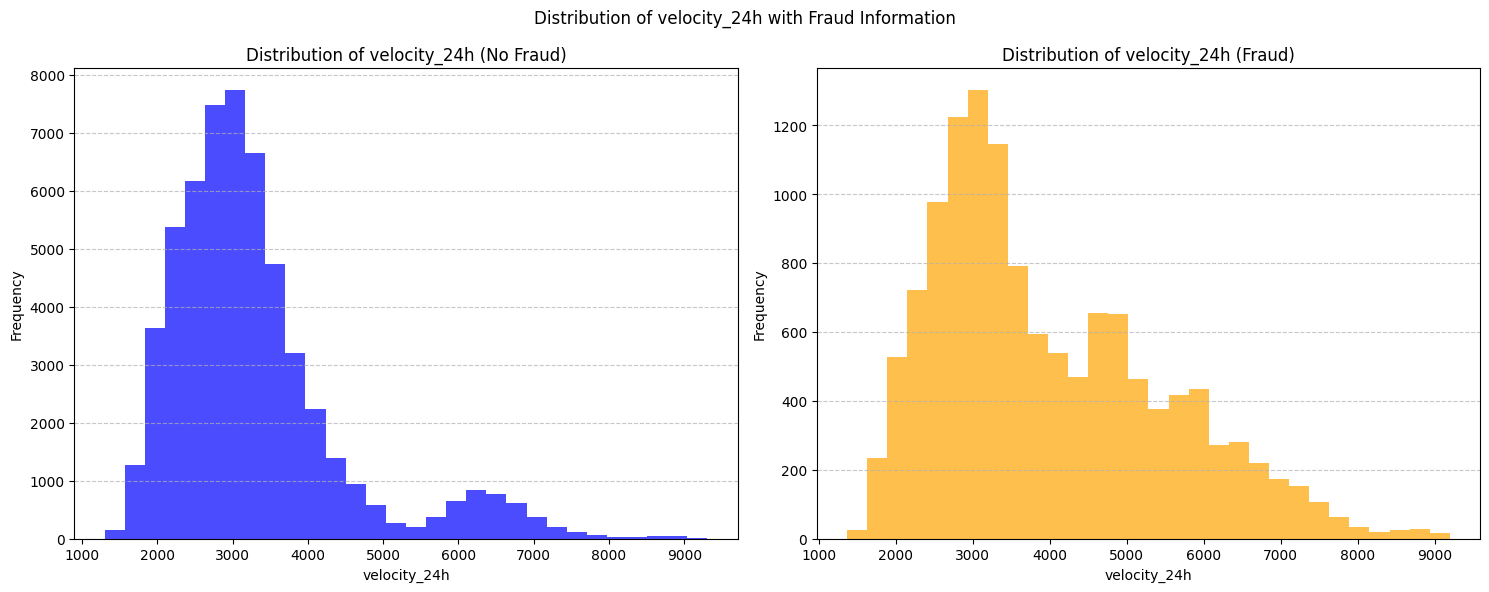

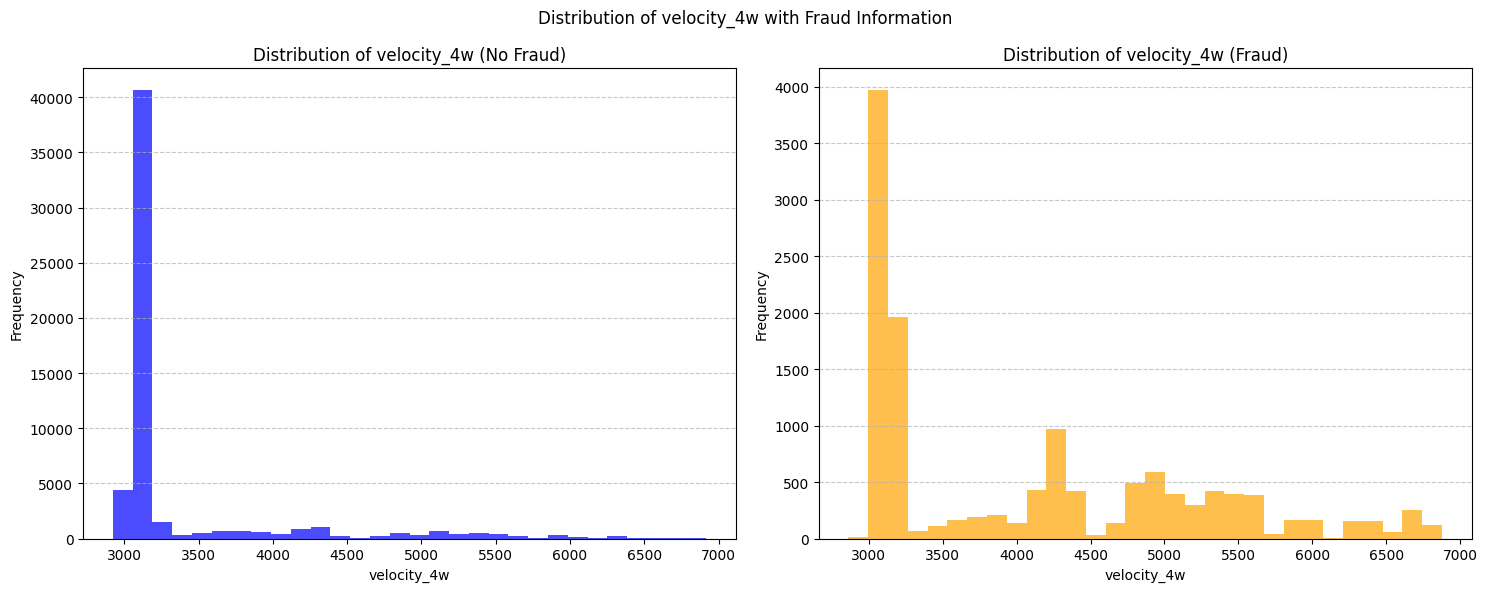

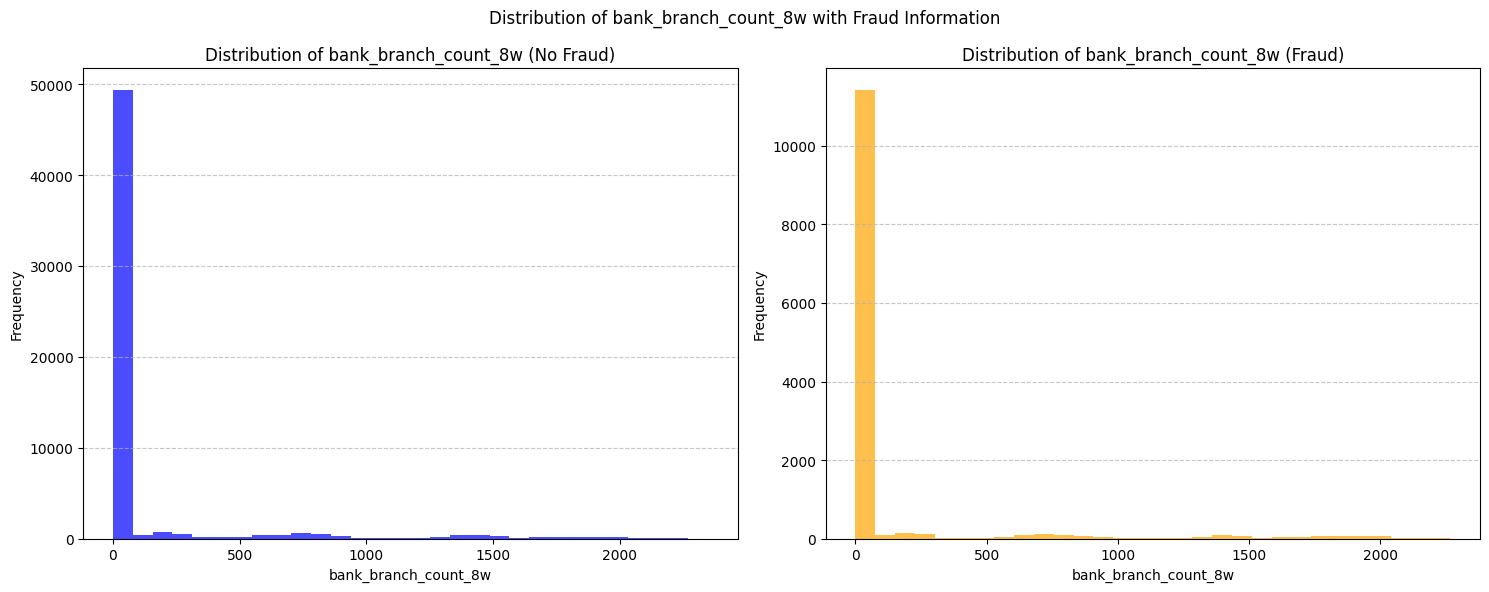

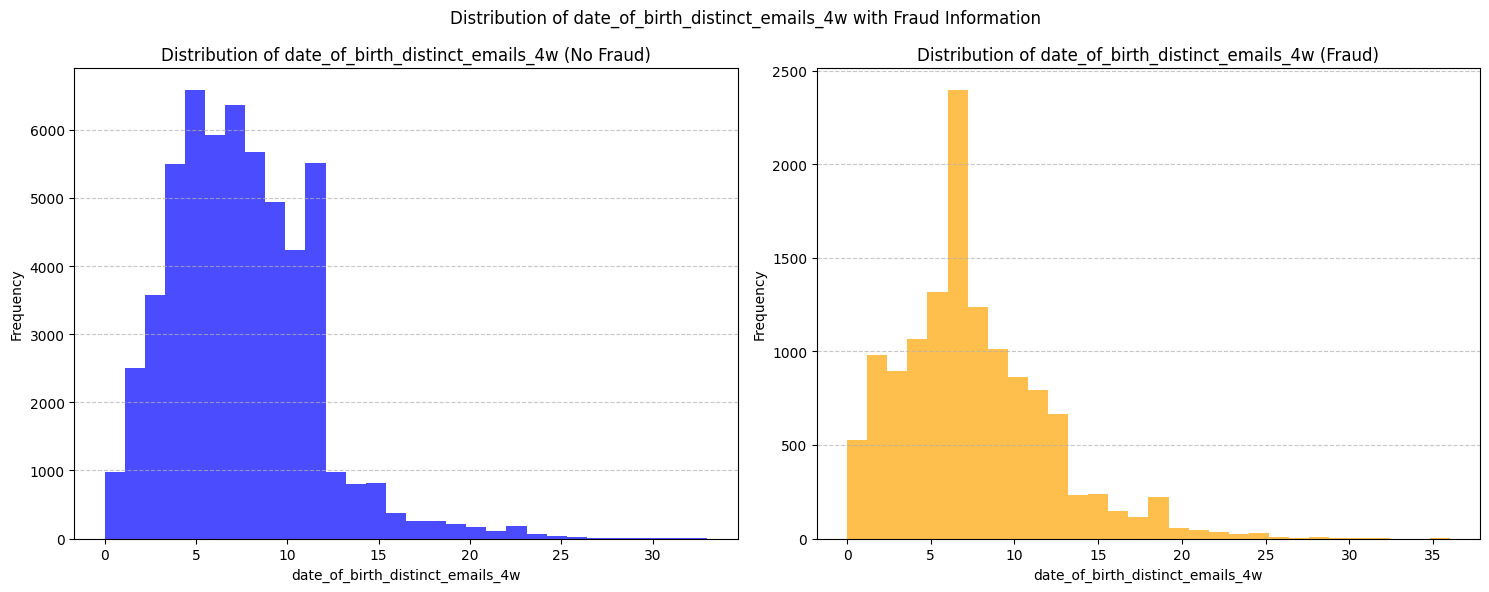

/tmp/ipykernel_8833/374368046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 0], x=column, order=categories_order, palette='Blues')
/tmp/ipykernel_8833/374368046.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 1], x=column, order=categories_order, palette='Oranges')


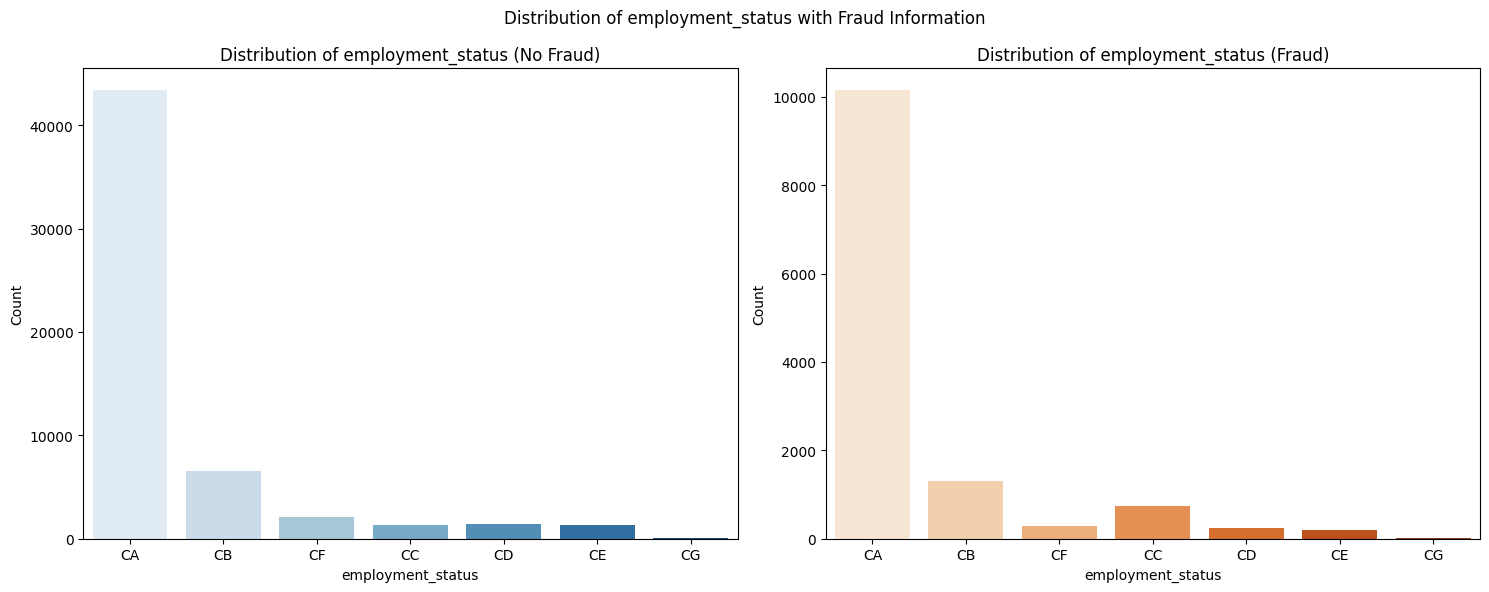

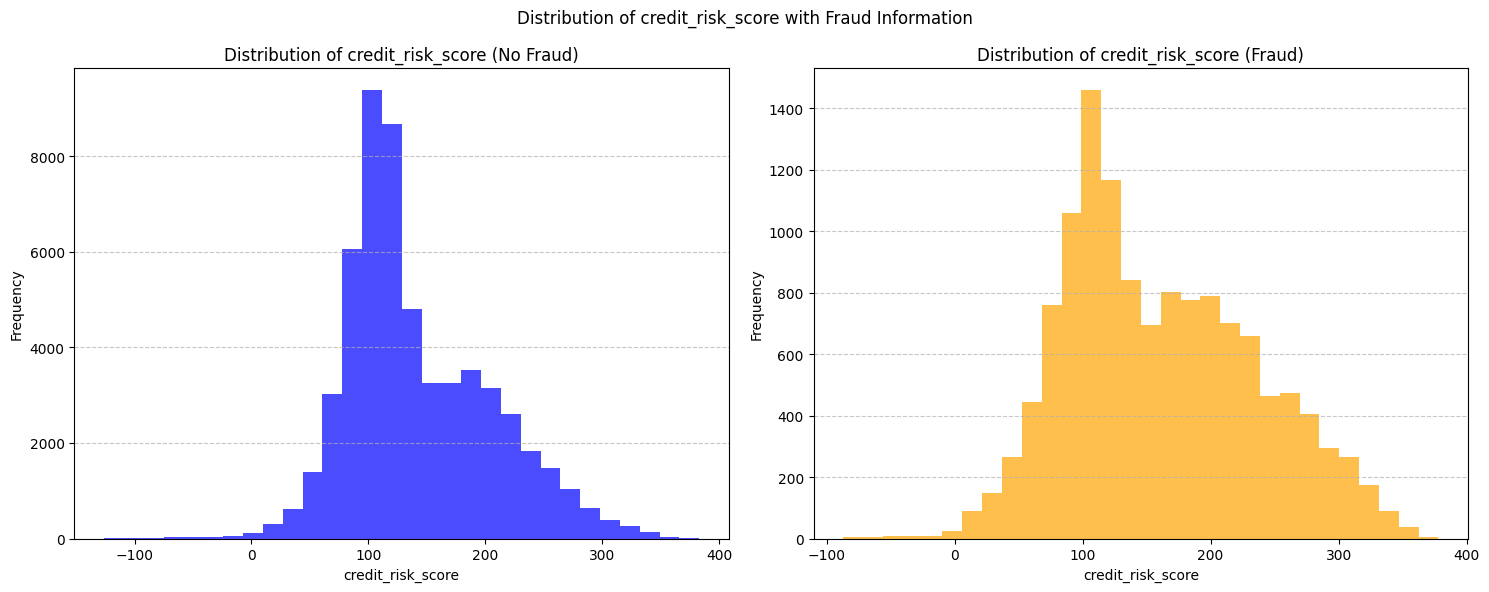

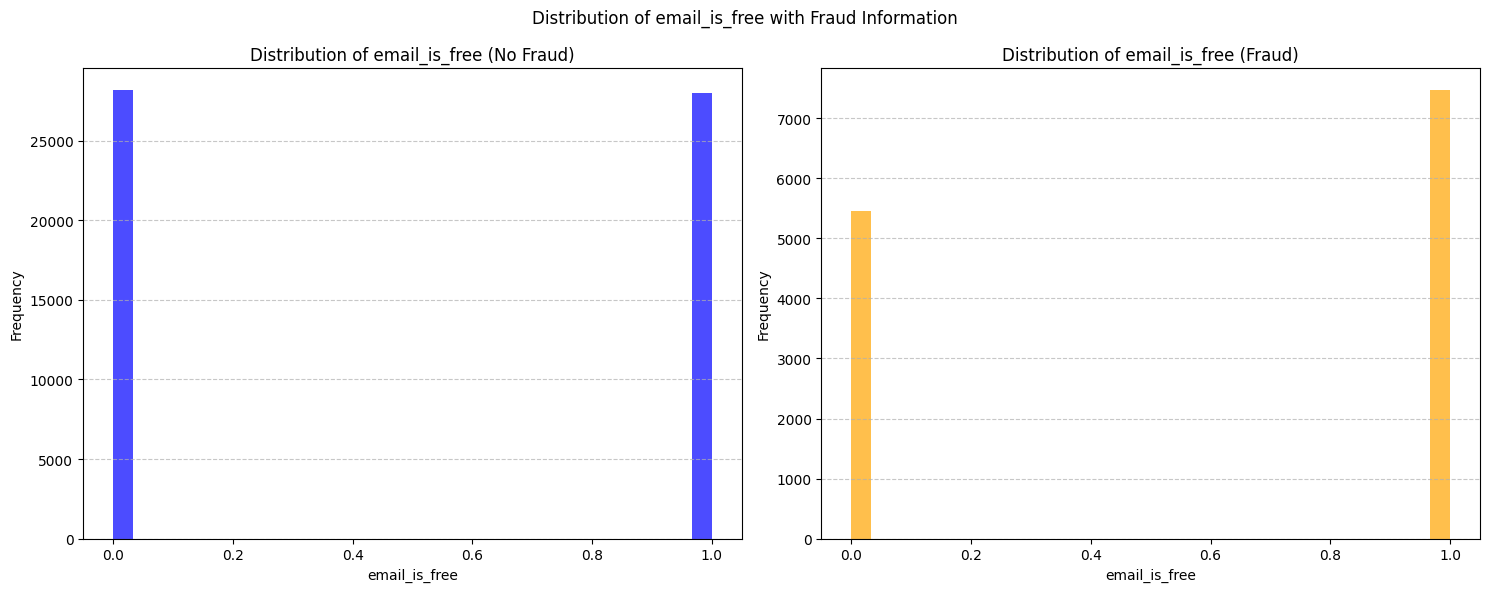

/tmp/ipykernel_8833/374368046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 0], x=column, order=categories_order, palette='Blues')
/tmp/ipykernel_8833/374368046.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 1], x=column, order=categories_order, palette='Oranges')


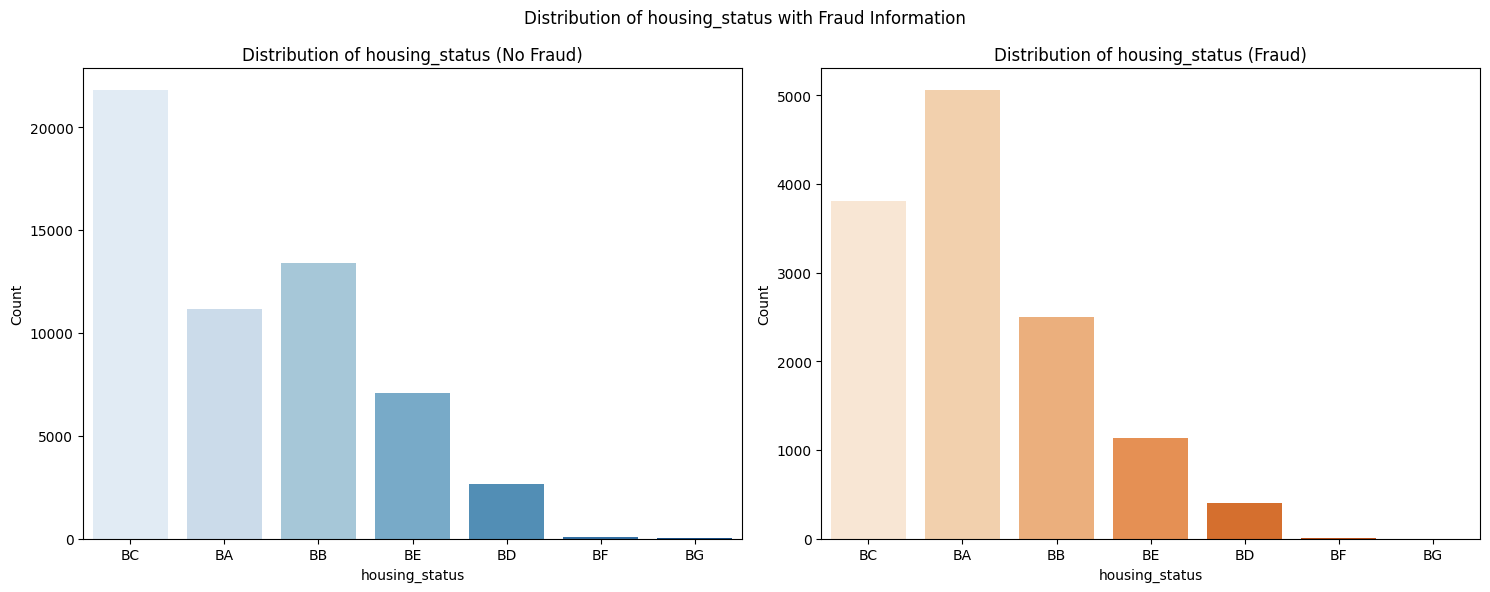

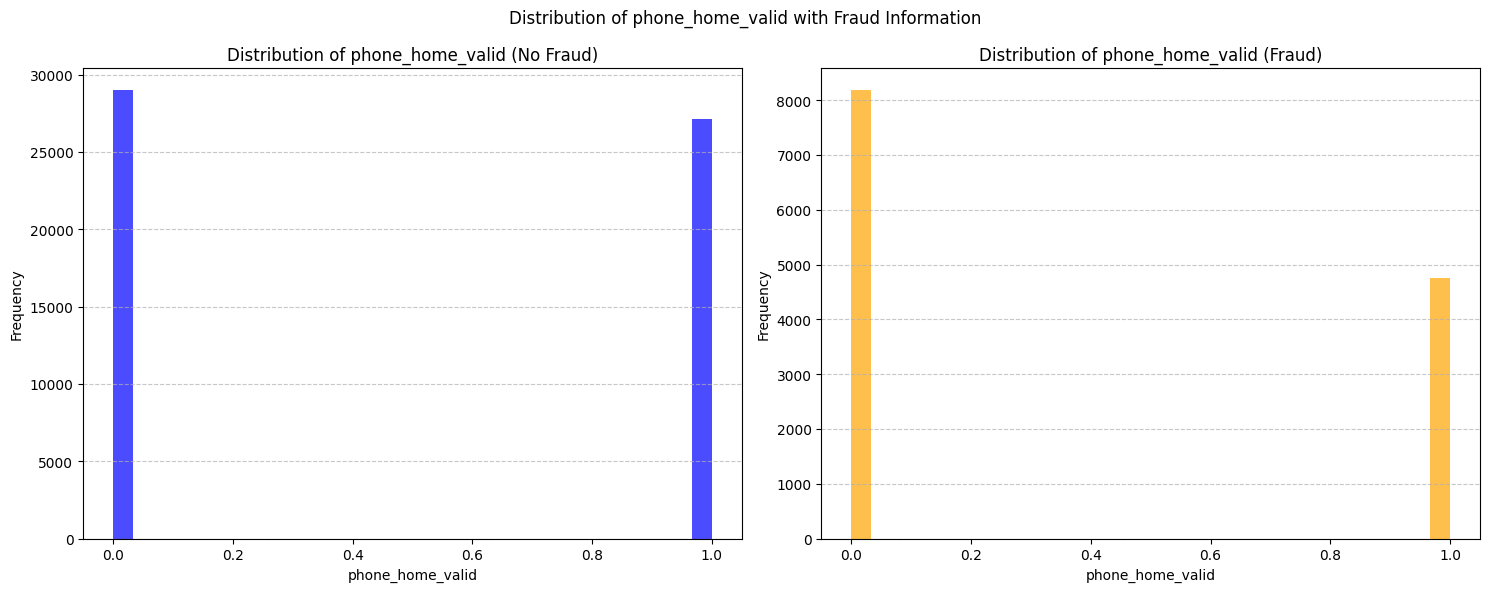

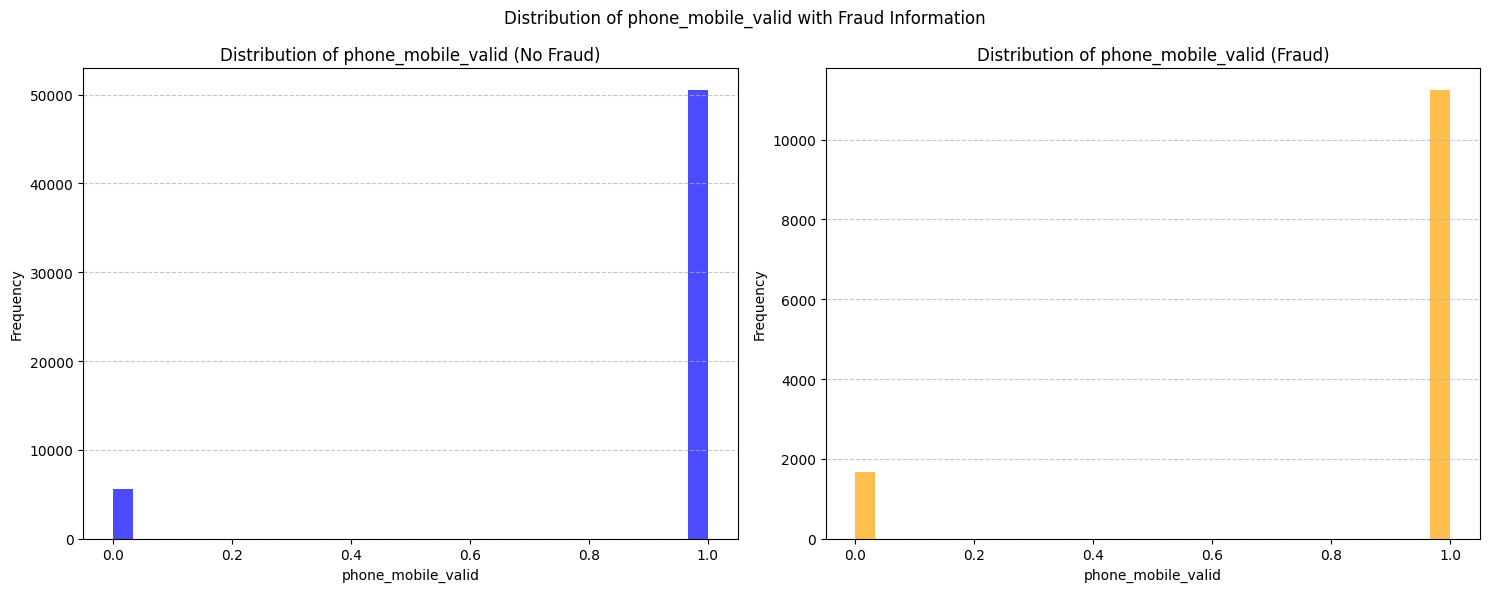

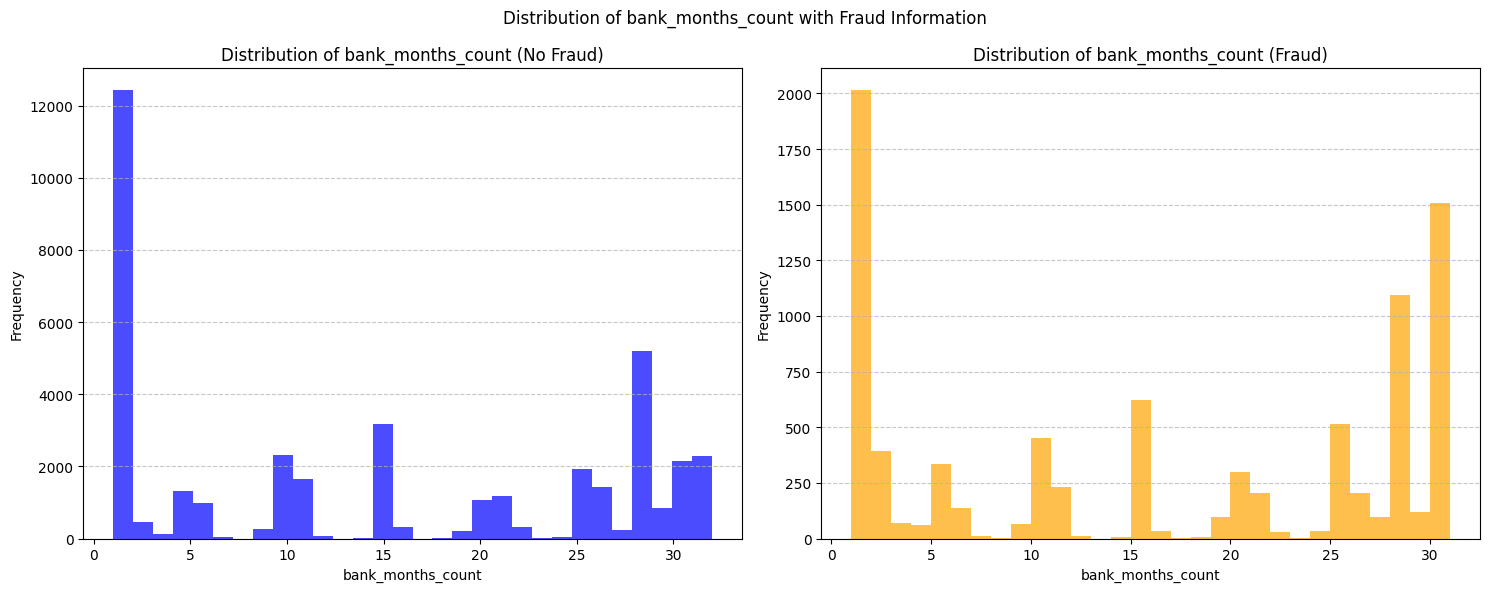

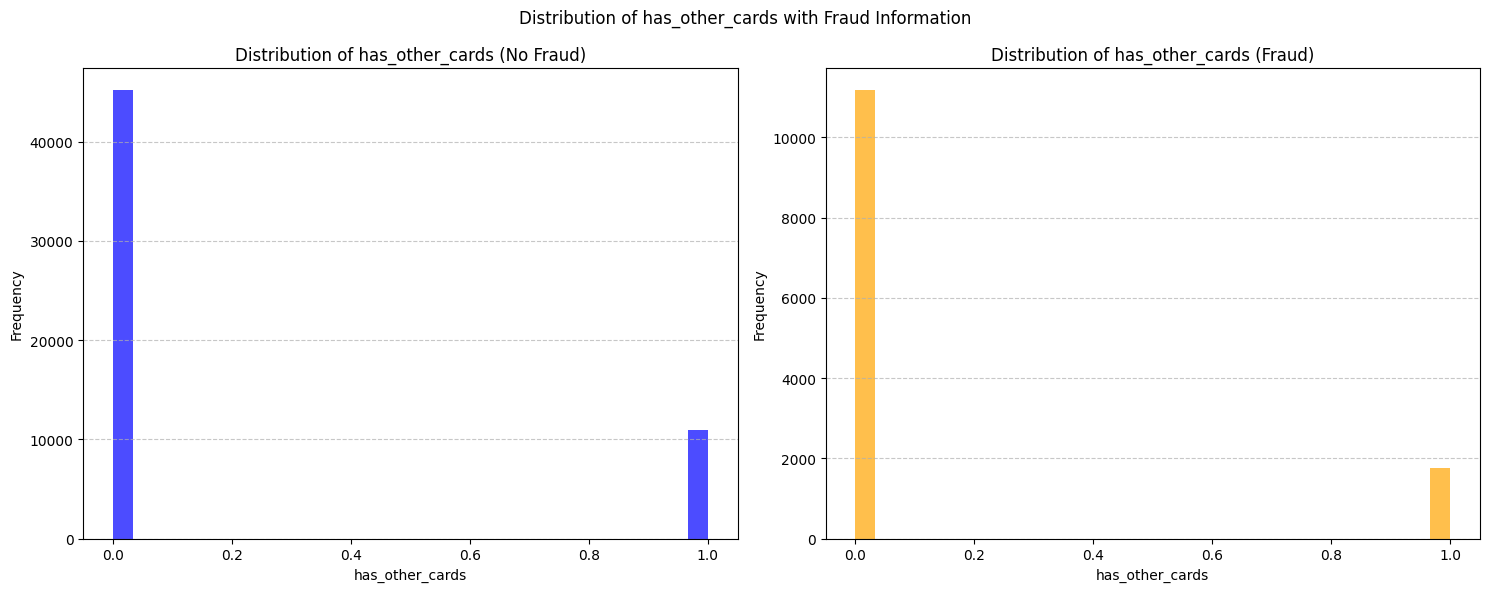

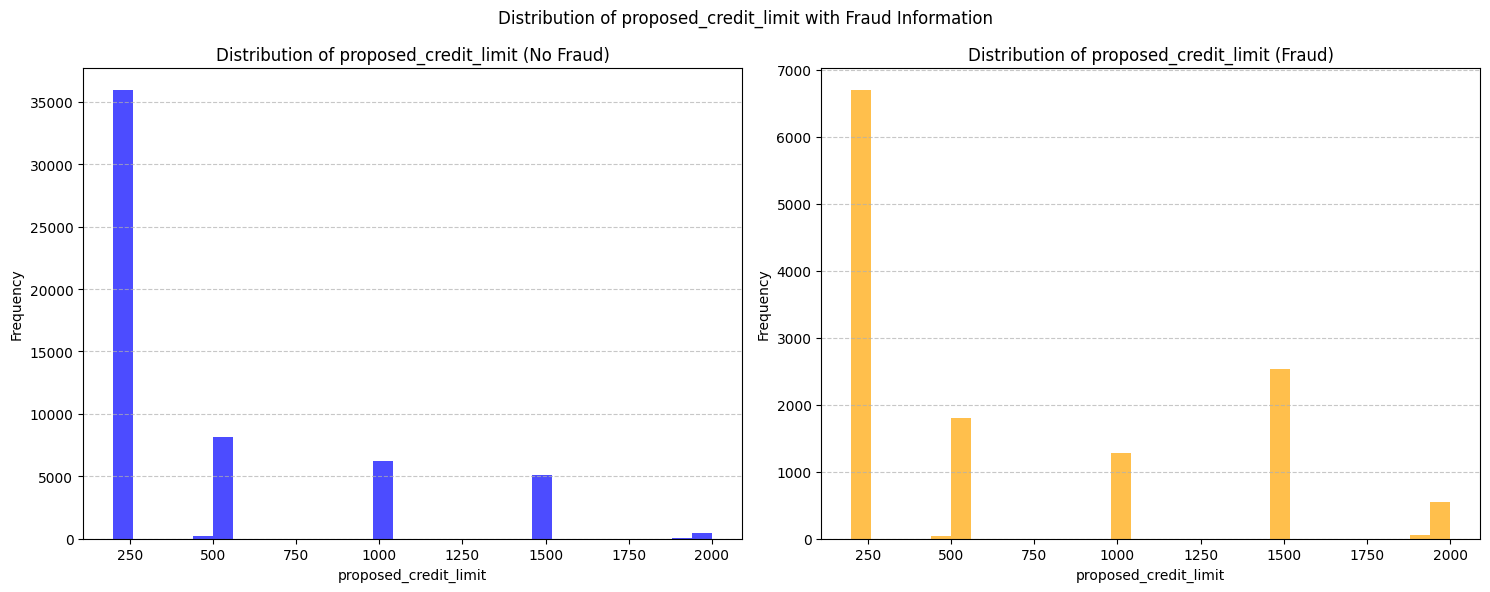

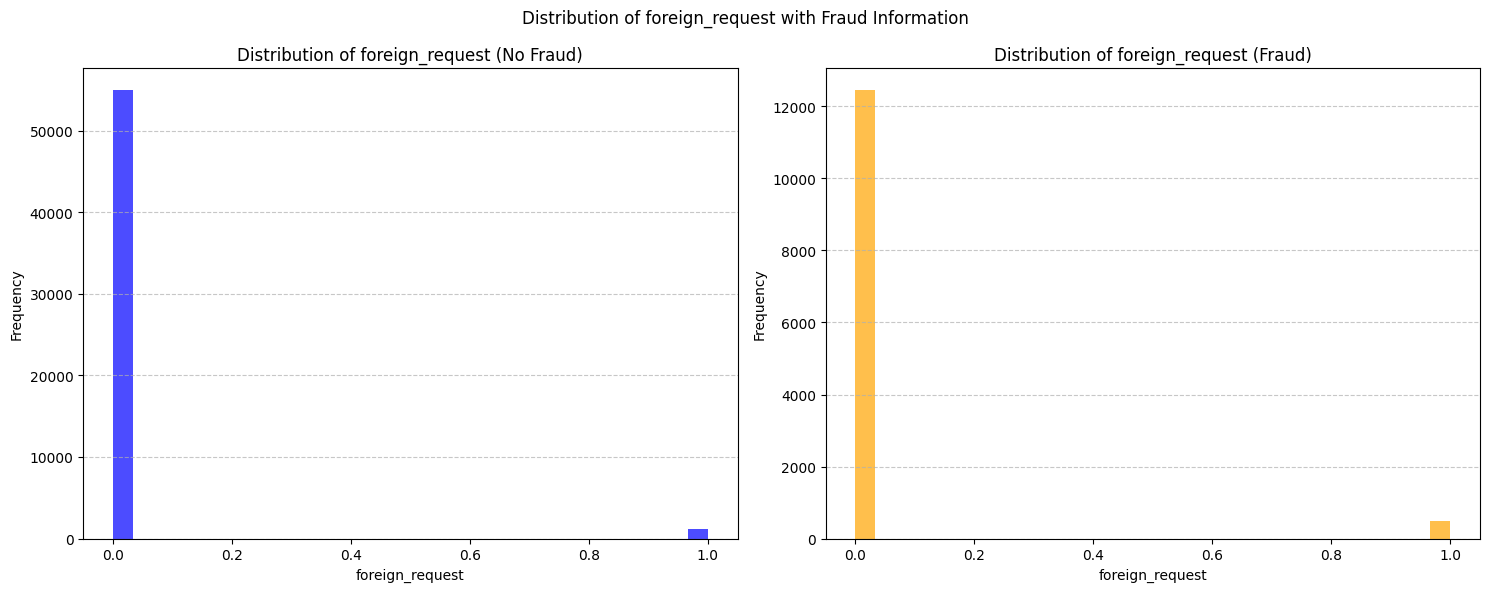

/tmp/ipykernel_8833/374368046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 0], x=column, order=categories_order, palette='Blues')
/tmp/ipykernel_8833/374368046.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 1], x=column, order=categories_order, palette='Oranges')


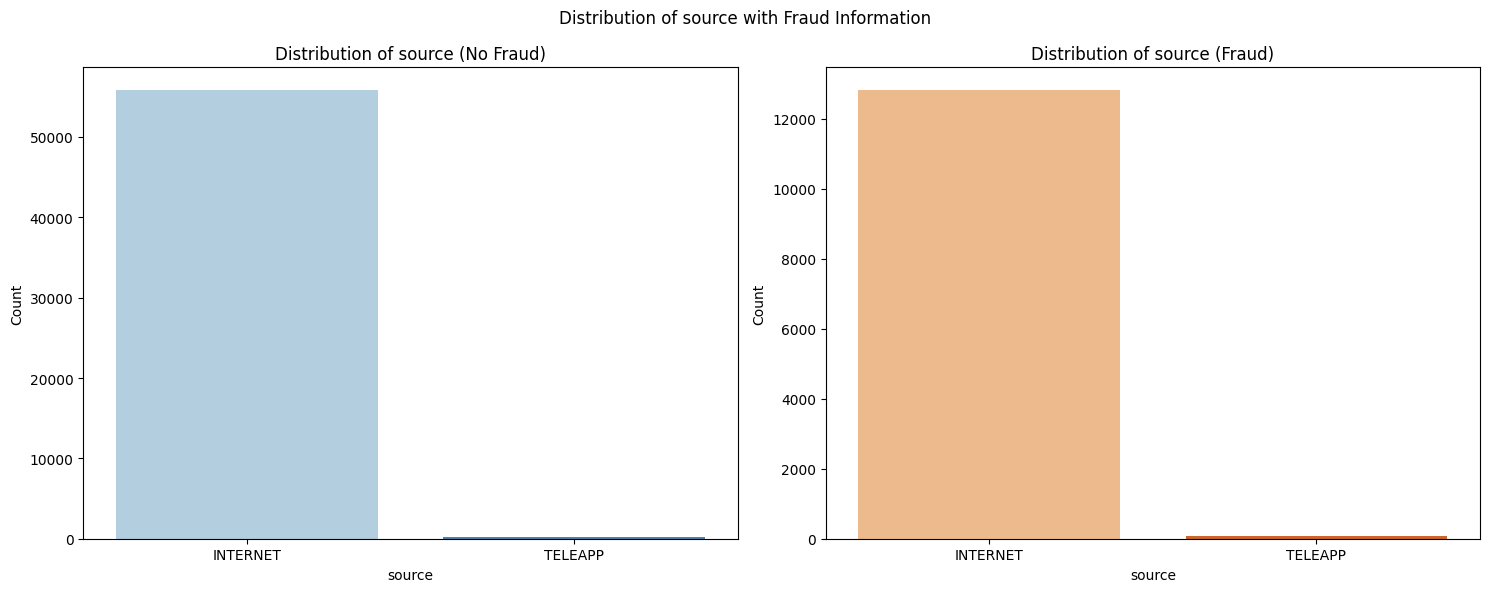

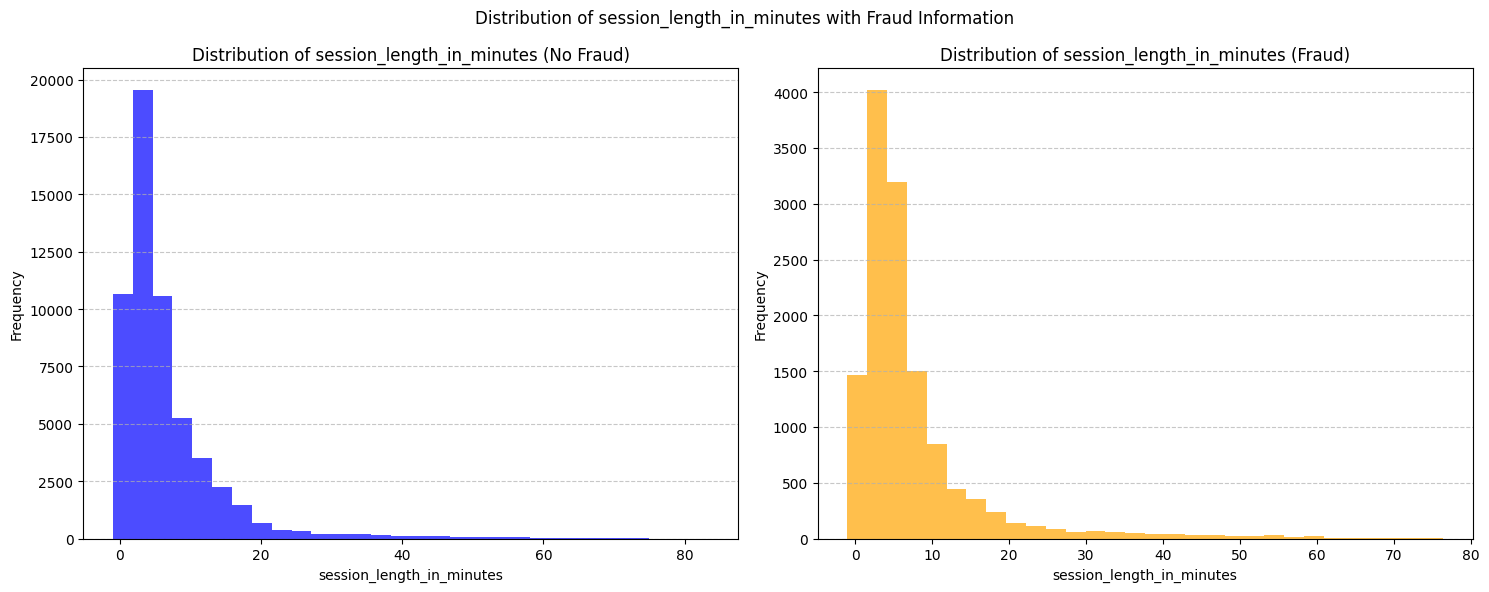

/tmp/ipykernel_8833/374368046.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 0], x=column, order=categories_order, palette='Blues')
/tmp/ipykernel_8833/374368046.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[fraud_column] == 1], x=column, order=categories_order, palette='Oranges')


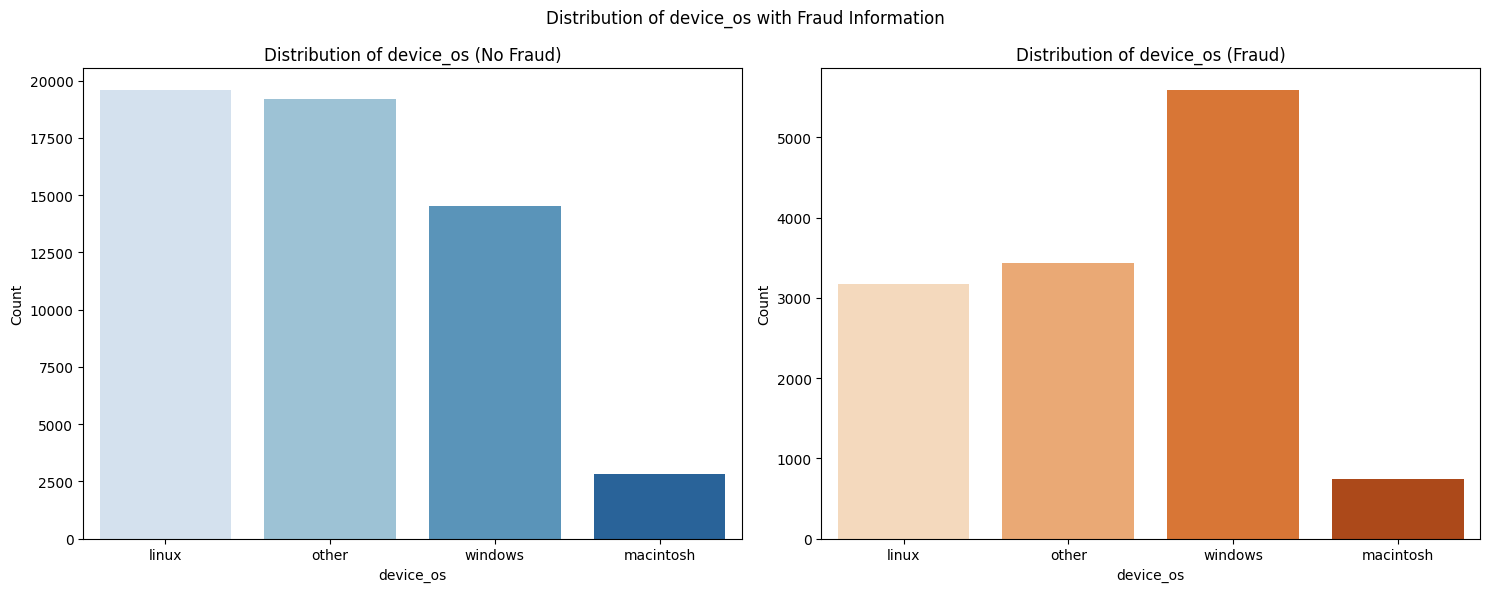

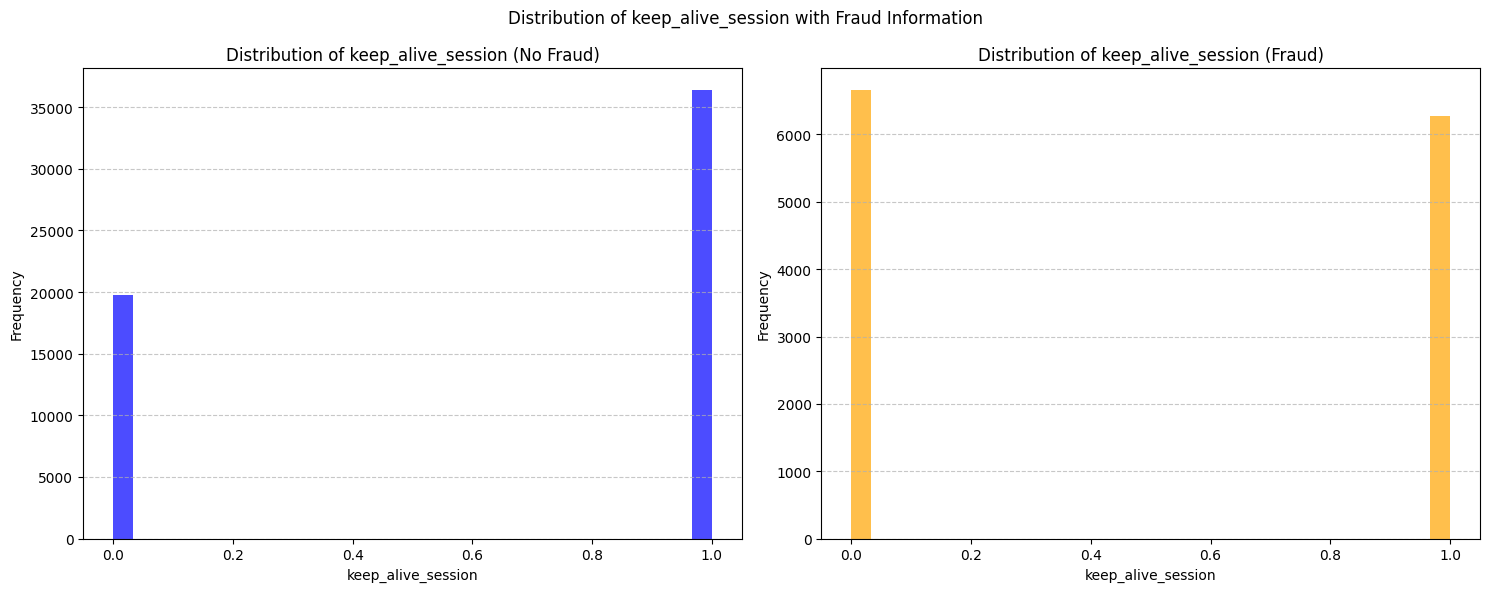

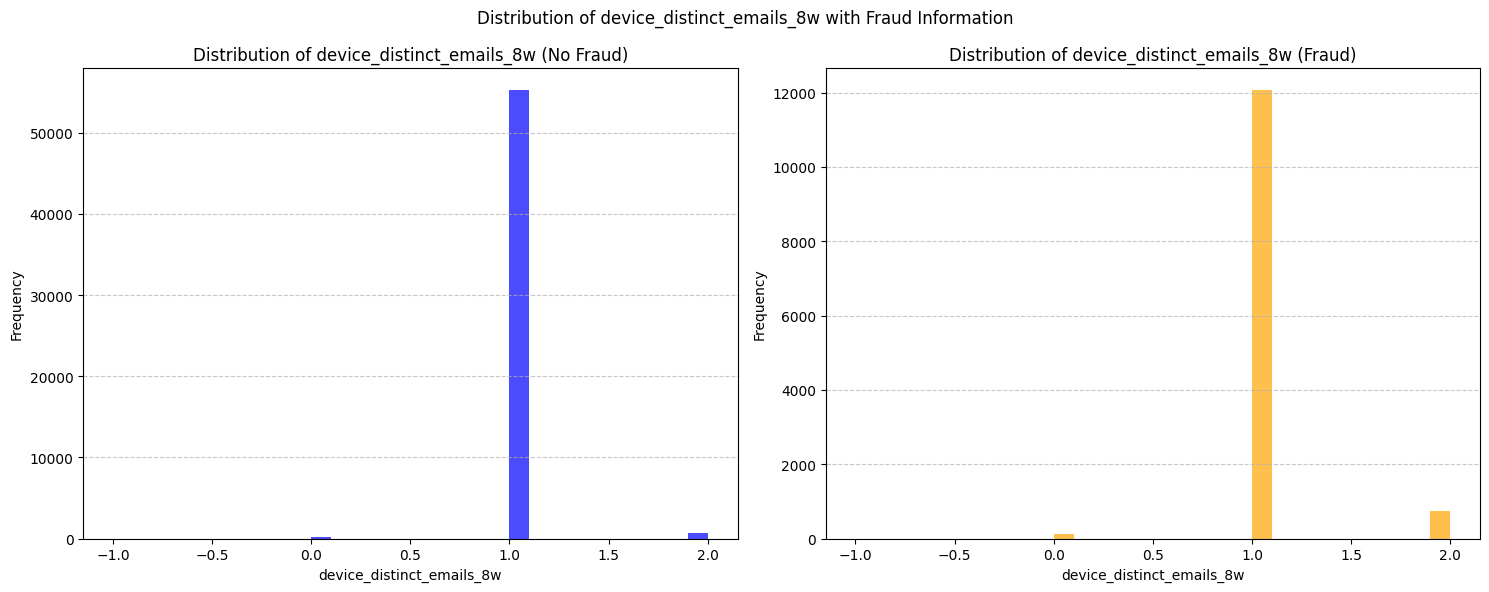

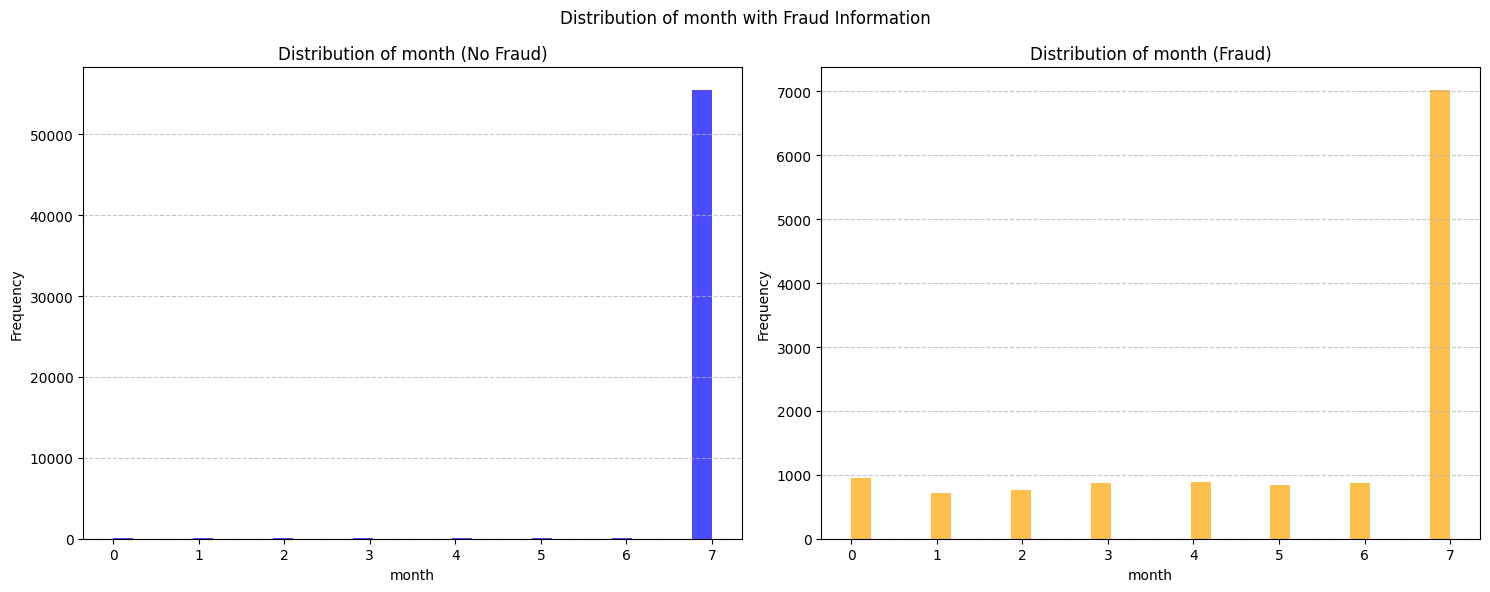

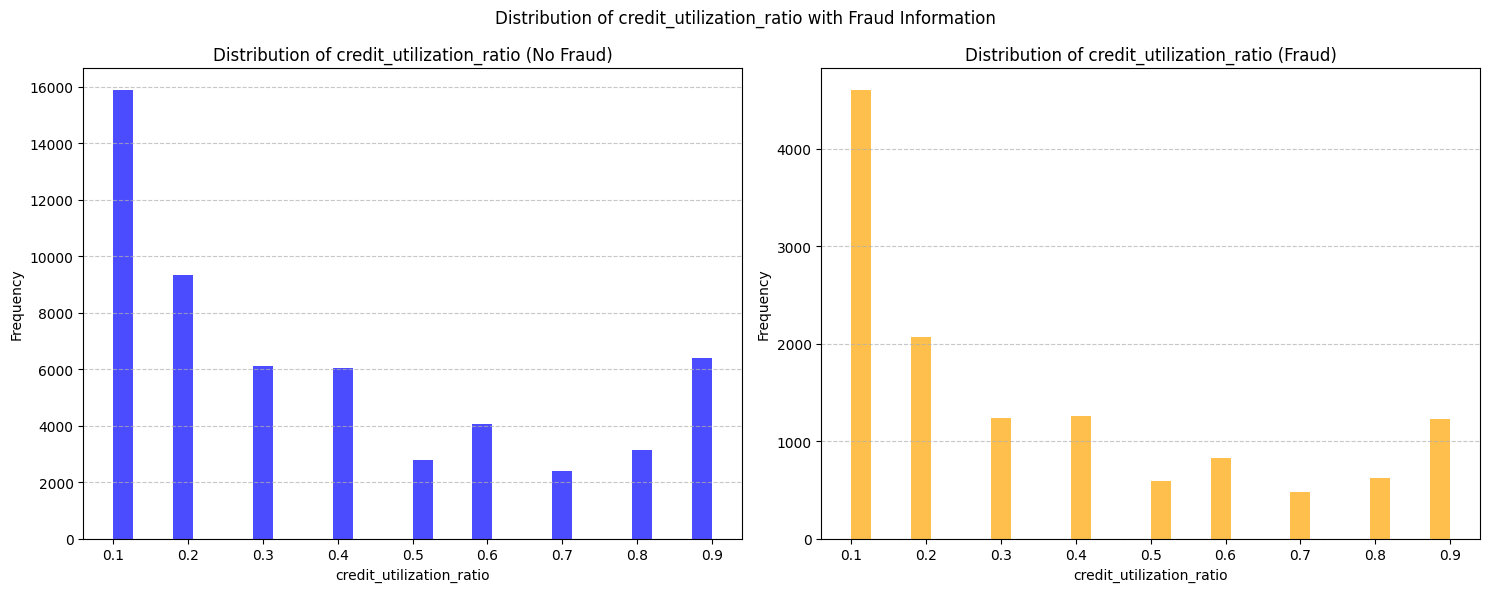

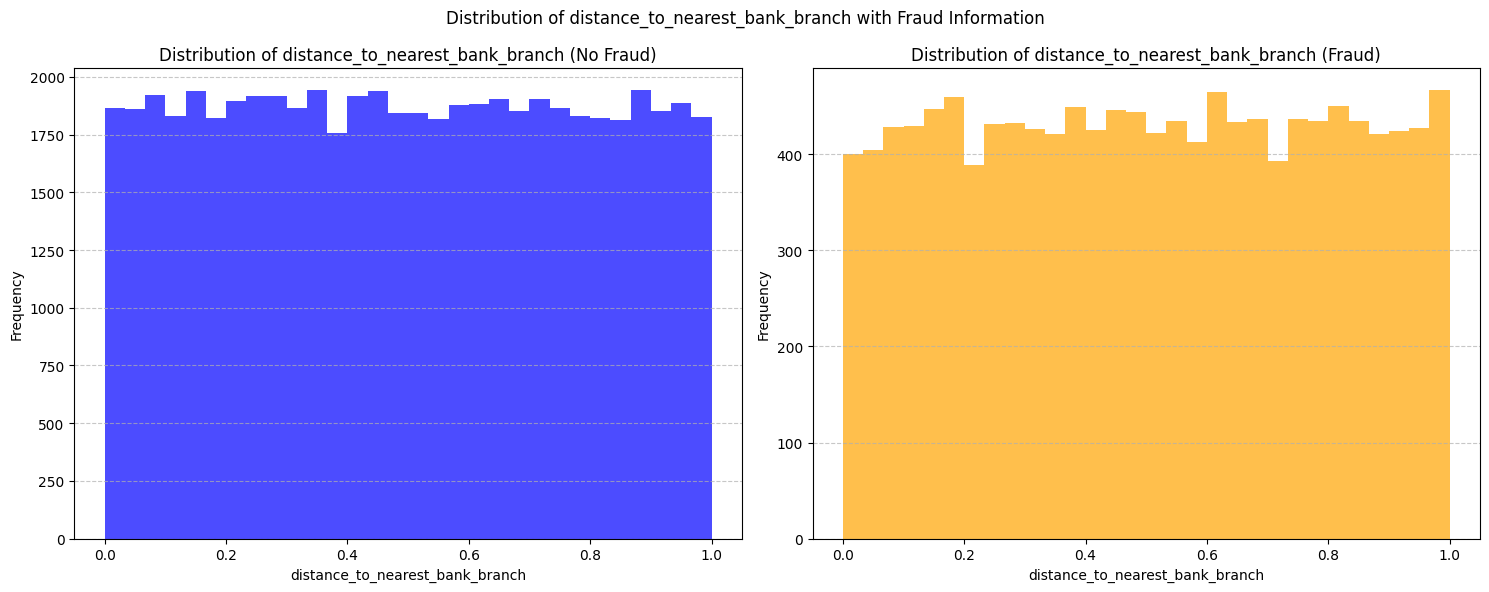

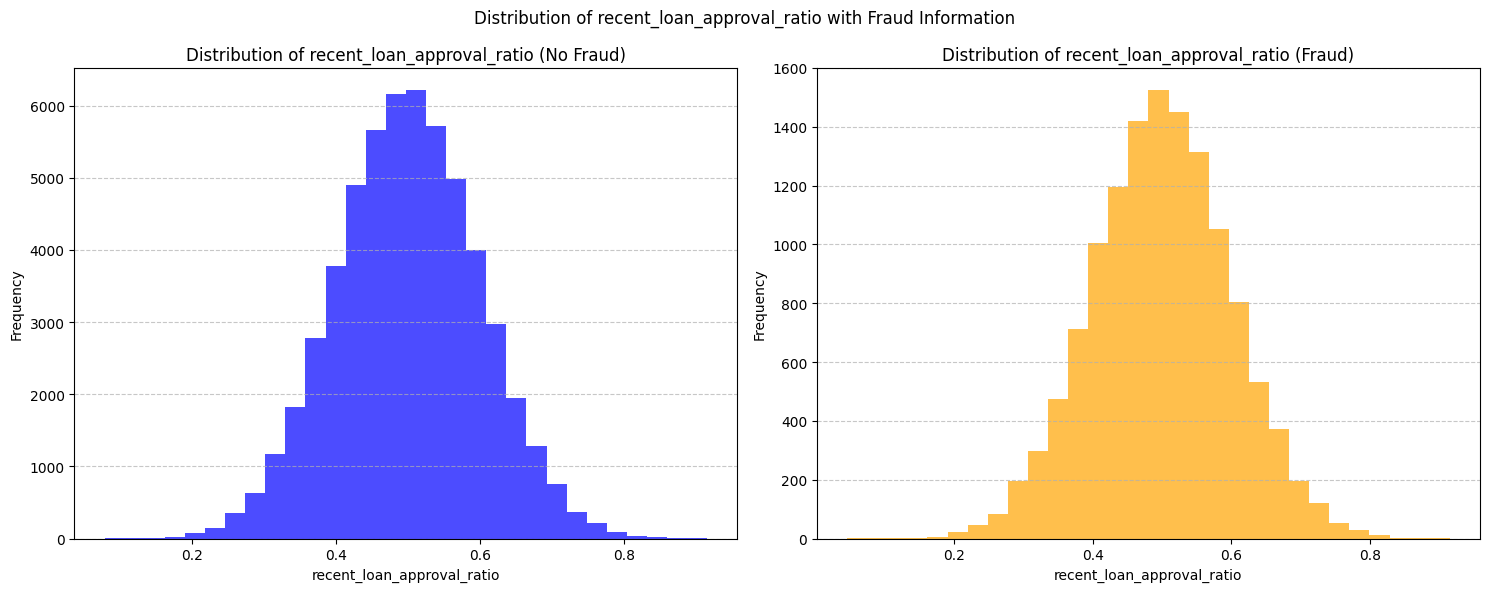

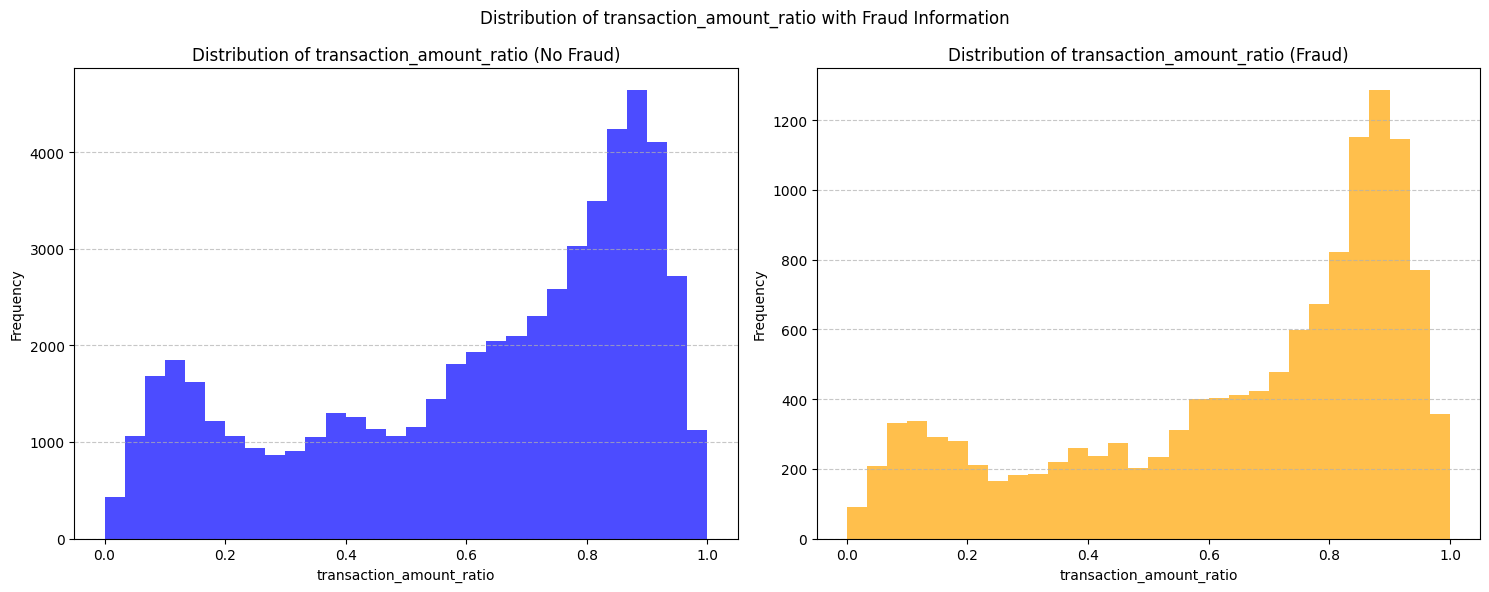

In [12]:
def plot_distributions_with_fraud(df, fraud_column, features_to_plot, output_directory='./plots'):
    if fraud_column not in df.columns:
        raise ValueError(f"A coluna '{fraud_column}' não está presente no DataFrame.")

    os.makedirs(output_directory, exist_ok=True)
    
    for column in features_to_plot:
        plt.figure(figsize=(15, 6))
        
        if df[column].dtype == 'O':  
            categories_order = df[column].astype('category').value_counts().index
            plt.subplot(1, 2, 1)
            sns.countplot(data=df[df[fraud_column] == 0], x=column, order=categories_order, palette='Blues')
            plt.title(f'Distribution of {column} (No Fraud)')
            plt.xlabel(column)
            plt.ylabel('Count')
            
            plt.subplot(1, 2, 2)
            sns.countplot(data=df[df[fraud_column] == 1], x=column, order=categories_order, palette='Oranges')
            plt.title(f'Distribution of {column} (Fraud)')
            plt.xlabel(column)
            plt.ylabel('Count')
        else:  # se for numérico
            plt.subplot(1, 2, 1)
            plt.hist(df[df[fraud_column] == 0][column], bins=30, color='blue', alpha=0.7)
            plt.title(f'Distribution of {column} (No Fraud)')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            
            plt.subplot(1, 2, 2)
            plt.hist(df[df[fraud_column] == 1][column], bins=30, color='orange', alpha=0.7)
            plt.title(f'Distribution of {column} (Fraud)')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.suptitle(f'Distribution of {column} with Fraud Information')
        plt.tight_layout()
        plt.savefig(f'{output_directory}/{column}_with_fraud.png')
        plt.show()

features_to_plot = df.select_dtypes(include='number').columns
features_to_plot = df.columns.drop('fraud_bool')
plot_distributions_with_fraud(df, 'fraud_bool', features_to_plot)

In [13]:
df['fraud_bool'].value_counts()/len(df)*100

0    81.281936
1    18.718064
Name: fraud_bool, dtype: float64

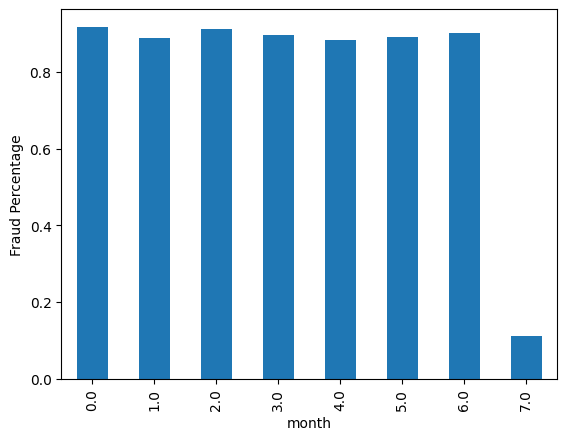

In [14]:
df.groupby('month')['fraud_bool'].mean().plot.bar()
plt.ylabel('Fraud Percentage')
plt.show()

In [15]:
df.groupby('month')['fraud_bool'].mean()*100

month
0.0    91.819057
1.0    88.820639
2.0    91.105769
3.0    89.762151
4.0    88.346614
5.0    89.266738
6.0    90.123457
7.0    11.237483
Name: fraud_bool, dtype: float64

## Conclusions

income - Multimodal distribution. Cannot extract any insights from this feature.

name_email_similarity - we can see that the histogram is multimodal. This means that there are multiple peaks in the data. In this case, we notice that there are 3 peaks. But in de fraud case, the left peak is higher than the other 2 peaks. This means that there are more fraud cases with low name_email_similarity, that can be explained by the fact that the fraudsters use fake emails.

current_address_month_count - Cannot extract any insights from this feature.

customer_age - follows a normal distribution. We can see that the bars between 40 and 60 are relatively higher than the bars on the non-fraud case. This means that there are more fraud cases with customers that have age between 40 and 60.

days_since_request - Cannot extract any insights from this feature.

intended_balcon_amount -  Cannot extract any insights from this feature.

payment_type - AB is the most common in both cases. Cannot extract any insights from this feature.

zip_count_4w - the distribution is identical in both cases. Around zip code 3000 there are more fraud cases than expected.

velocity_6h - the distribution is identical in both cases. Around 8000 there are more fraud cases than expected.

velocity_24h - the distribution is identical in both cases. Around 5000 and 6000 there are more fraud cases than expected.

velocity_4w - Cannot extract any insights from this feature.

bank_branch_count_8w - Cannot extract any insights from this feature.

date_of_birth_distinct_emails_4w - Cannot extract any insights from this feature.

employment_status - Cannot extract any insights from this feature.

credit_risk_score - Cannot extract any insights from this feature.

email_is_free - Cannot extract any insights from this feature.

housing_status - BC is more common in non-frauds BA is more common in frauds.

phone_home_valid - Cannot extract any insights from this feature.

phone_mobile_valid - Cannot extract any insights from this feature.

bank_months_count - Cannot extract any insights from this feature.

has_other_cards - Cannot extract any insights from this feature.

proposed_credit_limit - Cannot extract any insights from this feature.

foreign_request - Cannot extract any insights from this feature.

source - Cannot extract any insights from this feature.

session_length_in_minutes - Cannot extract any insights from this feature.

device_os - We see that the number of frauds is unexpectedly high for Windows.

keep_alive_session- Cannot extract any insights from this feature.

device_distinct_emails_8w - Cannot extract any insights from this feature.

month - In the fraud case, the percentage of frauds is extremely high in all months except for 7. Between 0 and 6 the percentage of fraud is near 90%.

credit_utilization_ratio - Cannot extract any insights from this feature.

distance_to_nearest_bank_branch - Cannot extract any insights from this feature.

recent_loan_approval_ratio - Cannot extract any insights from this feature.

transaction_amount_ratio - Cannot extract any insights from this feature.

# Preprocessing

Now that we have cleaned the data, we can start preprocessing it. We will be using OneHotEncoder to encode the categorical features.

In [16]:
columns_to_encode = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
encoders = {column: OneHotEncoder(sparse_output=False, handle_unknown='ignore') for column in columns_to_encode}

for column, encoder in encoders.items():
    encoded_data = encoder.fit_transform(df[column].values.reshape(-1, 1))
    encoded_columns = [f"{column}_{i}" for i in range(encoded_data.shape[1])]
    df[encoded_columns] = pd.DataFrame(encoded_data, columns=encoded_columns)

df.drop(columns=columns_to_encode, inplace=True)
df = df.fillna(0)      

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69083 entries, 0 to 69999
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   income                            69083 non-null  float64
 1   name_email_similarity             69083 non-null  float64
 2   current_address_months_count      69083 non-null  float64
 3   customer_age                      69083 non-null  float64
 4   days_since_request                69083 non-null  float64
 5   intended_balcon_amount            69083 non-null  float64
 6   zip_count_4w                      69083 non-null  float64
 7   velocity_6h                       69083 non-null  float64
 8   velocity_24h                      69083 non-null  float64
 9   velocity_4w                       69083 non-null  float64
 10  bank_branch_count_8w              69083 non-null  float64
 11  date_of_birth_distinct_emails_4w  69083 non-null  float64
 12  cred

# Correlations

                                    income  name_email_similarity  \
income                            1.000000              -0.029398   
name_email_similarity            -0.029398               1.000000   
current_address_months_count     -0.012661               0.046760   
customer_age                      0.142061              -0.052381   
days_since_request               -0.012244              -0.018042   
intended_balcon_amount            0.045672               0.027586   
zip_count_4w                     -0.035151              -0.009262   
velocity_6h                      -0.042401              -0.013359   
velocity_24h                     -0.033084              -0.008845   
velocity_4w                       0.004073              -0.038294   
bank_branch_count_8w              0.005150              -0.005792   
date_of_birth_distinct_emails_4w -0.056790               0.004483   
credit_risk_score                 0.154957               0.053605   
email_is_free                    -

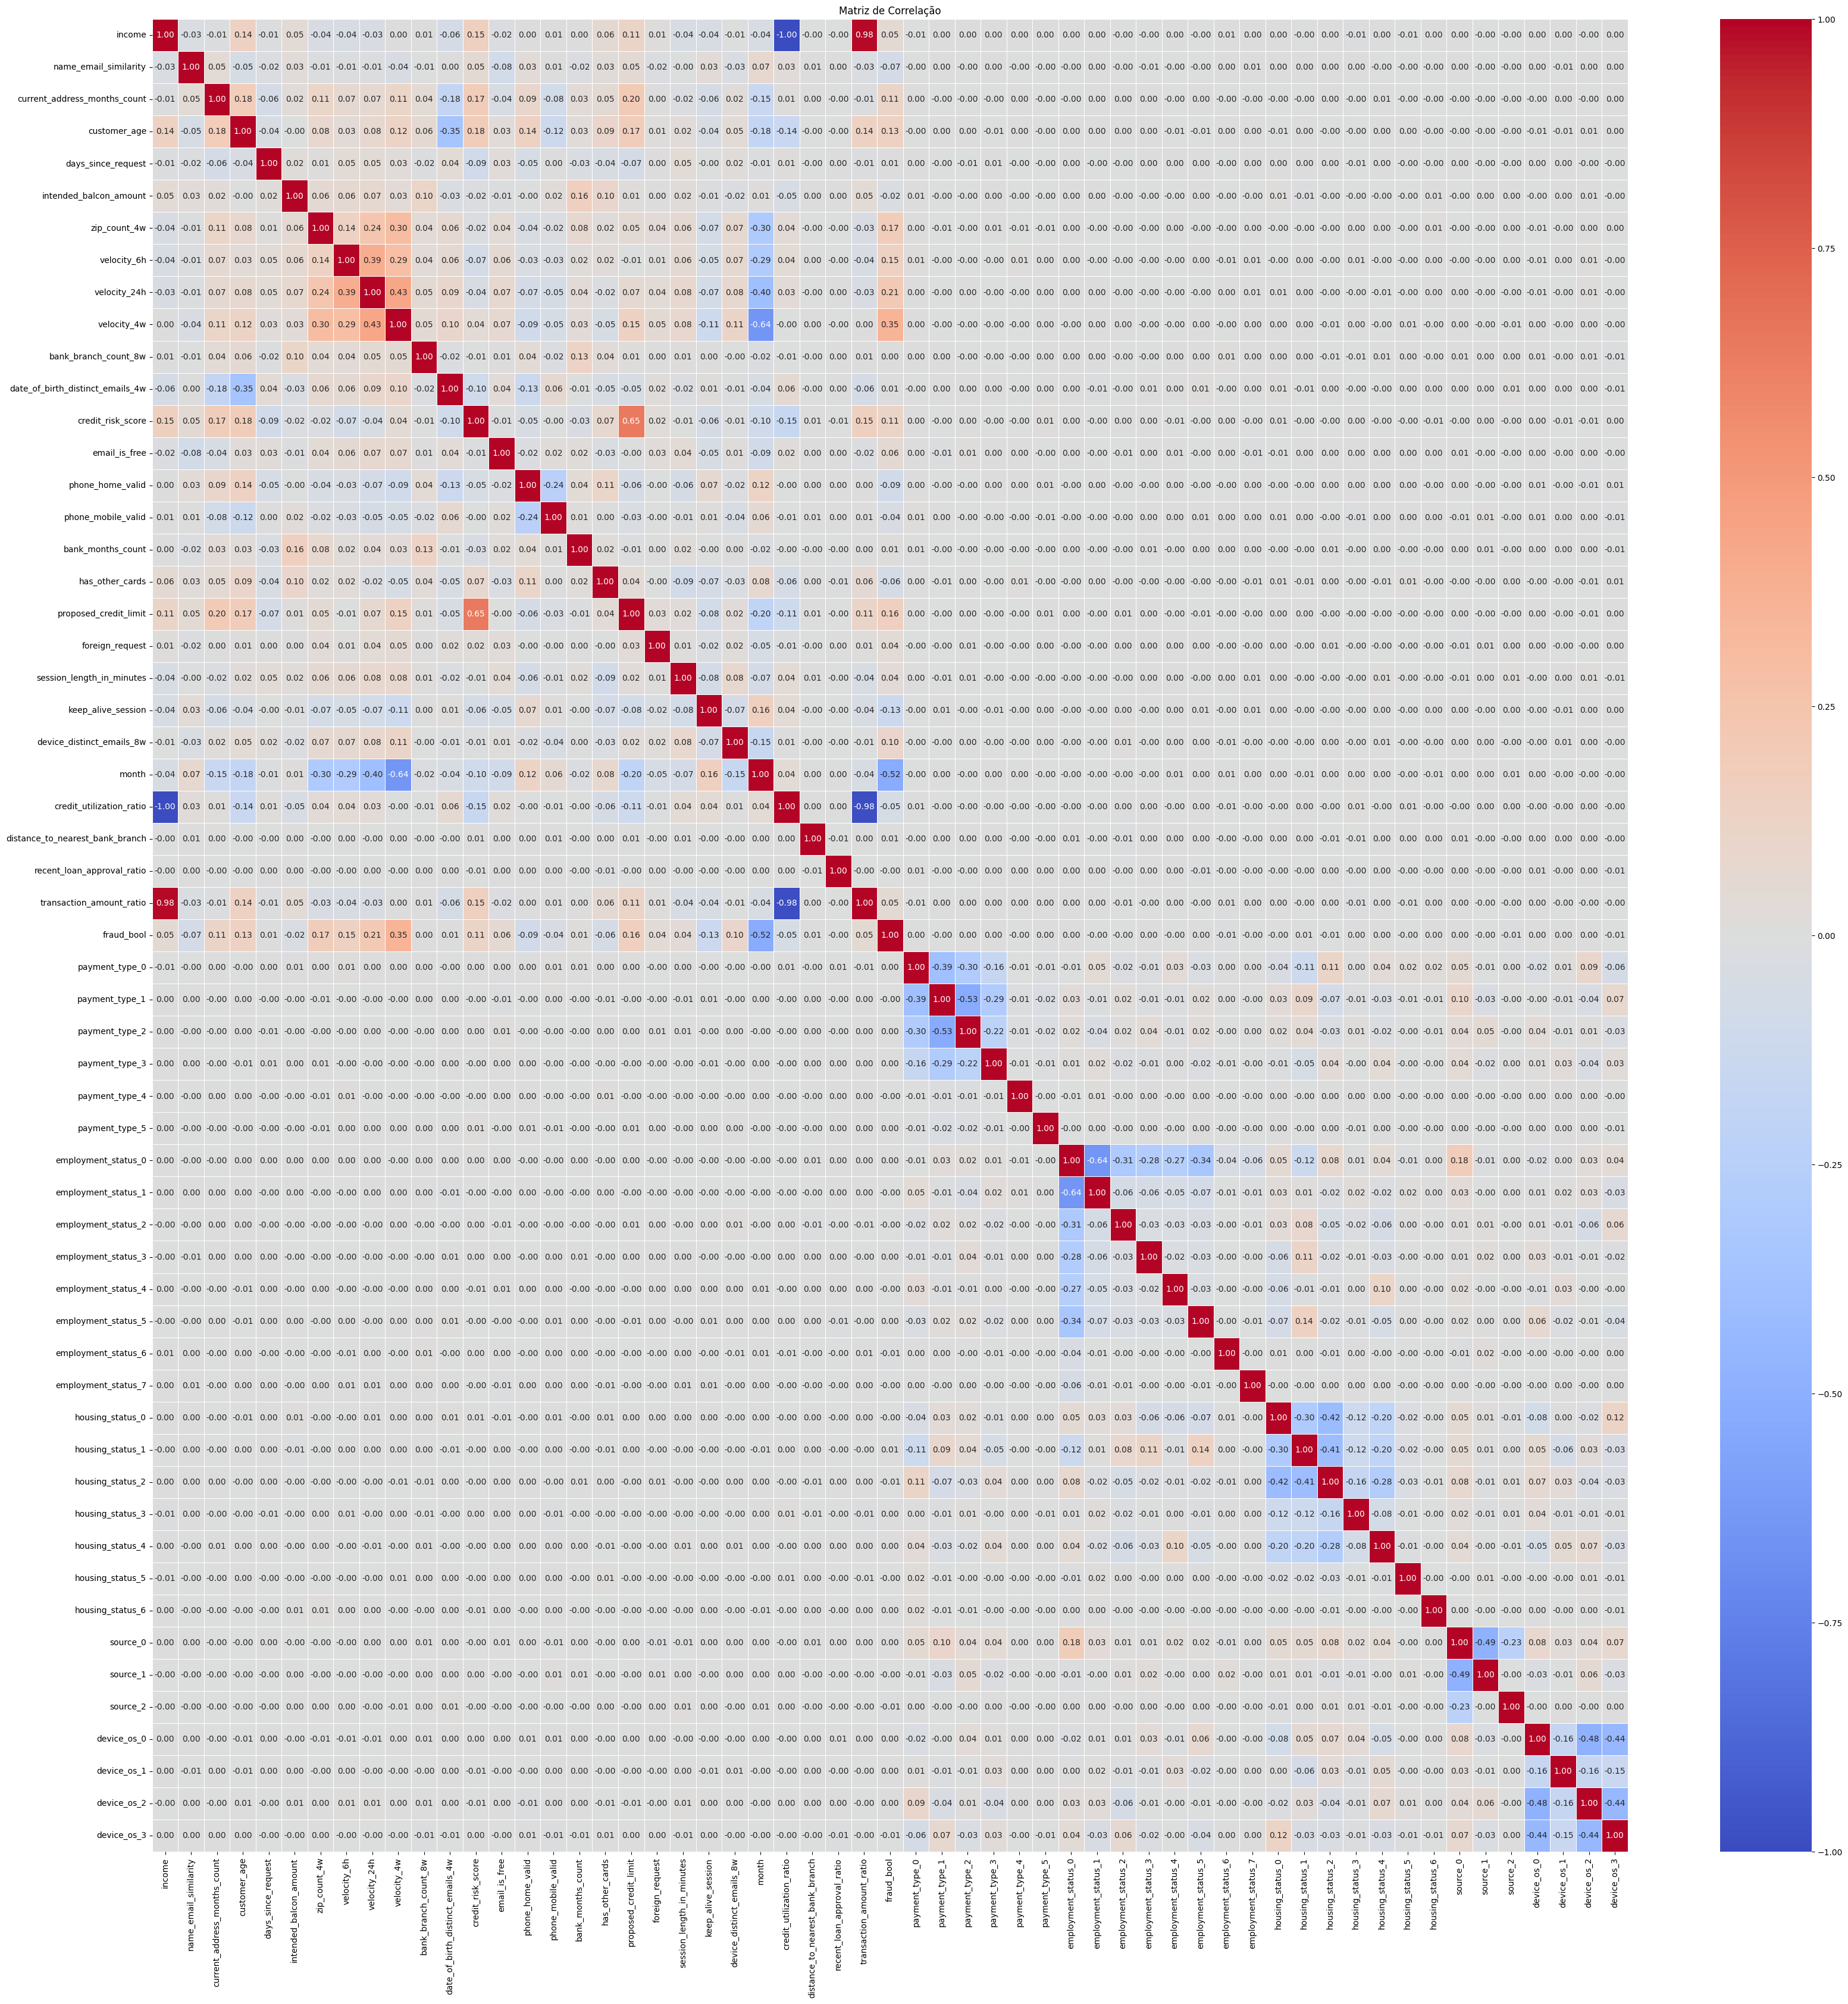

In [18]:
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.savefig('correlation_matrix.png')
plt.show()

# Feature Engineering

In [19]:
df['income_credit_limit_ratio'] = df['income'] / df['proposed_credit_limit']
df['income_credit_limit_ratio'].describe()
df['velocity_ratio_6h_24h'] = df['velocity_6h'] / df['velocity_24h']
df['velocity_ratio_6h_24h'].describe()

count    69083.000000
mean         1.159918
std          0.616137
min         -0.024413
25%          0.722428
50%          1.129576
75%          1.502255
max          8.195380
Name: velocity_ratio_6h_24h, dtype: float64

- Income_credit_limit_ratio: The income_credit_limit_ratio feature encapsulates the relationship between an applicant's income and the proposed credit limit. By quantifying this ratio, it becomes a valuable metric for gauging the applicant's financial capacity to meet the proposed credit terms in relation to their income. Higher values in this ratio might indicate a more robust ability to fulfill credit obligations, while lower values could hint at a potential disparity between income and the requested credit amount. The statistical description of this new feature provides insights into its distribution, aiding in the interpretation of its significance.

- Velocity_ratio_6h_24h: The velocity_ratio_6h_24h feature, when close to 1, indicates a relatively stable pattern in the applicant's request frequency over the past 6 hours compared to the previous 24 hours. This suggests a consistent behavior without significant fluctuations. On the other hand, abrupt variations in this ratio, diverging notably from the vicinity of 1, may signify unusual and potentially noteworthy shifts in the applicant's request behavior. These abrupt changes could be indicative of atypical activities that merit closer scrutiny, particularly in the context of fraud detection. Analyzing such deviations is crucial for enhancing the model's ability to identify potential fraudulent behavior.

# Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']

k_best = SelectKBest(score_func=f_classif, k=10)  # k é o número de features que queremos selecionar.
X_selected = k_best.fit_transform(X, y)
selected_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

X = df[selected_features]
y = df['fraud_bool']

Selected Features: Index(['current_address_months_count', 'customer_age', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score',
       'proposed_credit_limit', 'keep_alive_session', 'month'],
      dtype='object')


# OverSampling

We noitice that the data is imbalanced. We will be using SMOTE to balance the data.

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))



Original dataset shape Counter({0: 56152, 1: 12931})
Resampled dataset shape Counter({0: 56152, 1: 56152})


# Train and Test Splitting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

SVM done
XGboost done
Random Forest done
k-NN done
Decision Tree done
SVM Metrics:
Accuracy: 0.6869
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.86      0.73     11270
           1       0.78      0.51      0.62     11191

    accuracy                           0.69     22461
   macro avg       0.71      0.69      0.68     22461
weighted avg       0.71      0.69      0.68     22461

Confusion Matrix:
[[9691 1579]
 [5454 5737]]
XGBoost Metrics:
Accuracy: 0.9026
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     11270
           1       0.98      0.82      0.89     11191

    accuracy                           0.90     22461
   macro avg       0.91      0.90      0.90     22461
weighted avg       0.91      0.90      0.90     22461

Confusion Matrix:
[[11128   142]
 [ 2045  9146]]
Random Forest Metrics:
Accuracy: 0.8794
Classification Report:
         

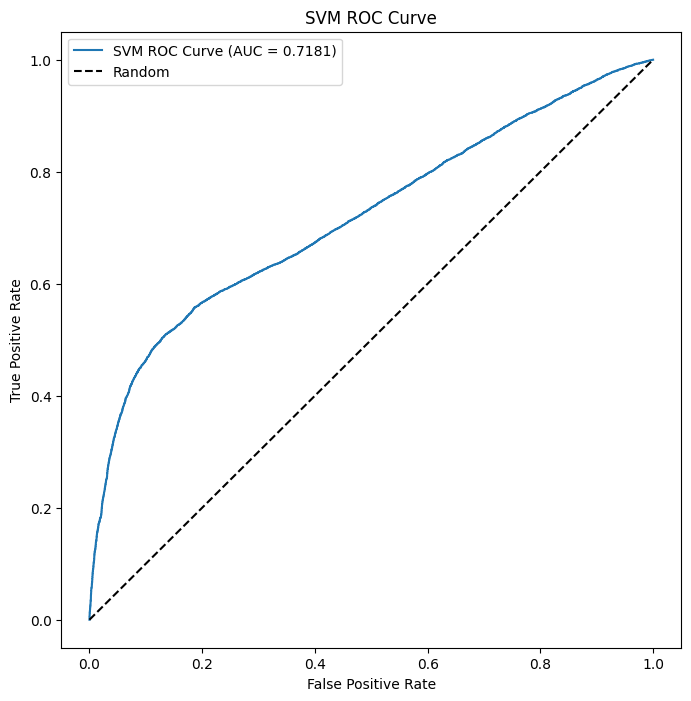

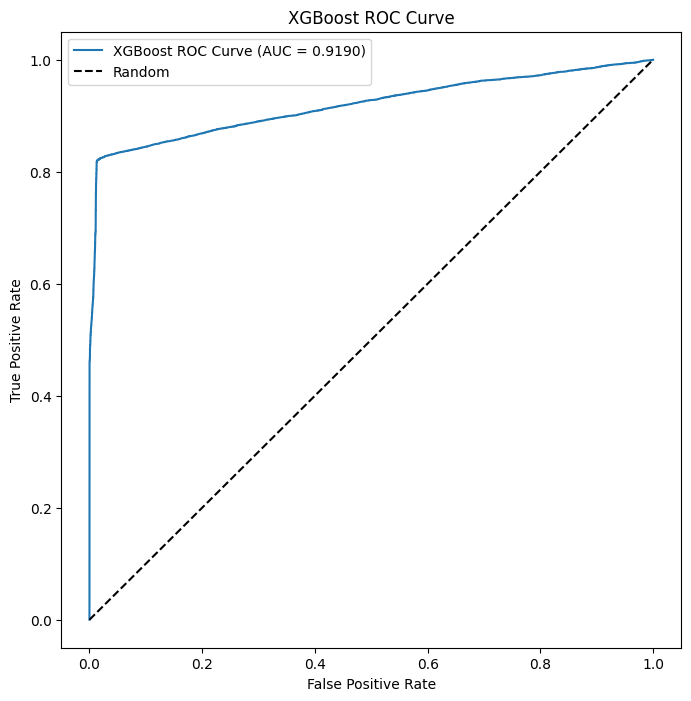

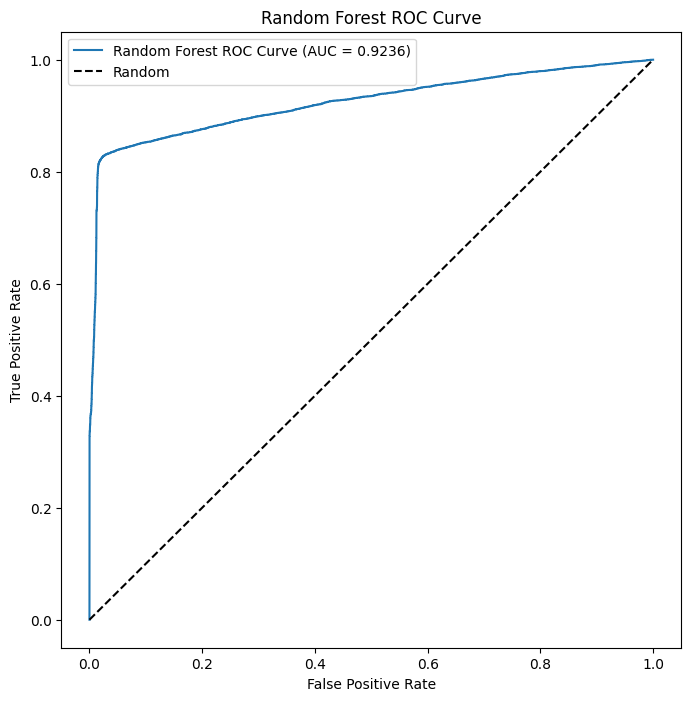

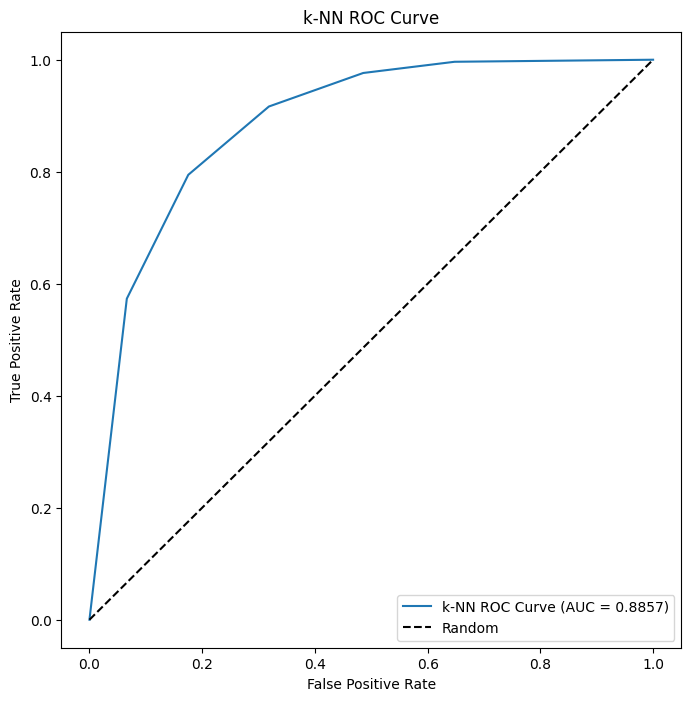

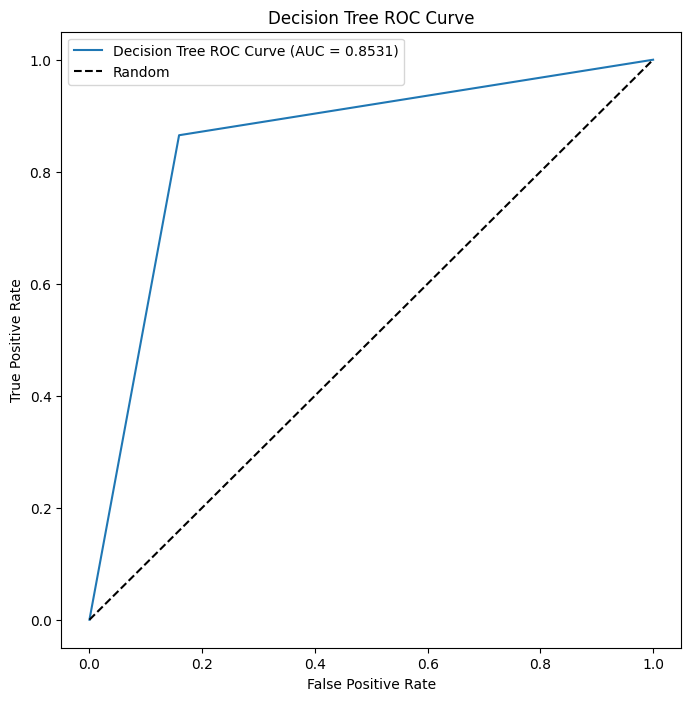

/tmp/ipykernel_8833/3024466093.py:157: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df = test_df.fillna(test_df.median())
/tmp/ipykernel_8833/3024466093.py:162: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_df.drop(['device_fraud_count', 'id'],1,inplace=True)


Chosen model: RandomForestClassifier(max_depth=10, random_state=42)


In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Modelo SVM
model_svm = SVC(kernel='linear', random_state=42, probability=True)
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)

# Avaliação do modelo SVM
svm_accuracy = accuracy_score(y_test, predictions_svm)
svm_classification_report = classification_report(y_test, predictions_svm)
svm_confusion_matrix = confusion_matrix(y_test, predictions_svm)

print("SVM done")

# Modelo XGBoost
model_xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)

# Avaliação do modelo XGBoost
xgb_accuracy = accuracy_score(y_test, predictions_xgb)
xgb_classification_report = classification_report(y_test, predictions_xgb)
xgb_confusion_matrix = confusion_matrix(y_test, predictions_xgb)

print("XGboost done")

# Modelo Random Forest
model_rf = RandomForestClassifier(max_depth=10, min_samples_split=2, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

# Avaliação do modelo Random Forest
rf_accuracy = accuracy_score(y_test, predictions_rf)
rf_classification_report = classification_report(y_test, predictions_rf)
rf_confusion_matrix = confusion_matrix(y_test, predictions_rf)

print("Random Forest done")

# Modelo k-Nearest Neighbors (k-NN)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)

# Avaliação do modelo k-NN
knn_accuracy = accuracy_score(y_test, predictions_knn)
knn_classification_report = classification_report(y_test, predictions_knn)
knn_confusion_matrix = confusion_matrix(y_test, predictions_knn)

print("k-NN done")

# Modelo Árvore de Decisão
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_test)

# Avaliação do modelo Árvore de Decisão
dt_accuracy = accuracy_score(y_test, predictions_dt)
dt_classification_report = classification_report(y_test, predictions_dt)
dt_confusion_matrix = confusion_matrix(y_test, predictions_dt)

print("Decision Tree done")

# Imprimir resultados para o modelo SVM
print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Classification Report:")
print(svm_classification_report)
print("Confusion Matrix:")
print(svm_confusion_matrix)

# Imprimir resultados para o modelo XGBoost
print("XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print("Classification Report:")
print(xgb_classification_report)
print("Confusion Matrix:")
print(xgb_confusion_matrix)

# Imprimir resultados para o modelo Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_classification_report)
print("Confusion Matrix:")
print(rf_confusion_matrix)

# Imprimir resultados para o modelo k-NN
print("\nk-NN Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print("Classification Report:")
print(knn_classification_report)
print("Confusion Matrix:")
print(knn_confusion_matrix)

# Imprimir resultados para o modelo Árvore de Decisão
print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print("Classification Report:")
print(dt_classification_report)
print("Confusion Matrix:")
print(dt_confusion_matrix)

models = {
    'SVM': model_svm,
    'XGBoost': model_xgb,
    'Random Forest': model_rf,
    'k-NN': model_knn,
    'Decision Tree': model_dt,
}

def print_and_get_roc_auc(model_name, y_true, predictions_prob):
    auc_score = roc_auc_score(y_true, predictions_prob)
    fpr, tpr, _ = roc_curve(y_true, predictions_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f"{model_name} ROC Curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} ROC Curve")
    plt.legend(loc='best')
    plt.show()

    return auc_score

def choose_best_model(models, X_train, y_train, X_test, y_test):
    best_model = None
    best_auc_score = 0

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions_prob = model.predict_proba(X_test)[:, 1]
        auc_score = print_and_get_roc_auc(model_name, y_test, predictions_prob)

        if auc_score > best_auc_score:
            best_auc_score = auc_score
            best_model = model

    return best_model

# Print and get ROC AUC for each model
for model_name, model in models.items():
    predictions_prob = model.predict_proba(X_test)[:, 1]

# Escolher o melhor modelo e dar predict do ficheiro test.csv 
best_model = model_svm
#best_model = choose_best_model(models, X_train, y_train, X_test, y_test)
test_df = load_test_csv('test.csv')

# Data Cleaning and Feature Engineering
test_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
result_df = pd.DataFrame({'ID': test_df['id']})
test_df = test_df.fillna(test_df.median())
columns_to_encode = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
encoders = {column: OneHotEncoder(sparse_output=False, handle_unknown='ignore') for column in columns_to_encode}
test_df['velocity_ratio_6h_24h'] = test_df['velocity_6h'] / test_df['velocity_24h']
test_df['income_credit_limit_ratio'] = test_df['income'] / test_df['proposed_credit_limit']
test_df.drop(['device_fraud_count', 'id'],1,inplace=True)
for column, encoder in encoders.items():
    encoded_data = encoder.fit_transform(test_df[column].values.reshape(-1, 1))
    encoded_columns = [f"{column}_{i}" for i in range(encoded_data.shape[1])]
    test_df[encoded_columns] = pd.DataFrame(encoded_data, columns=encoded_columns)
test_df.drop(columns=columns_to_encode, inplace=True)
test_df = test_df.fillna(0) 
remove_columns = ['device_os_4', 'prev_address_months_count']
test_df = test_df.drop(remove_columns, axis=1)

# Fazer previsões apenas nas colunas selecionadas
predictions_test = best_model.predict(test_df[selected_features])
print("Chosen model:", best_model)

# Adicionar coluna 'fraud_bool' aos dados de teste
result_df['fraud_bool'] = predictions_test

# Guardar previsões em um arquivo CSV
result_df.to_csv('predictions.csv', index=False, header=True)

